# 期末類別型資料分析

C111156103, 潘奕濬


## 環境設定


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib_inline

plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

## Import data from UCI machine learning repository


In [3]:
# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
assert mushroom.data is not None
assert isinstance(mushroom.data.features, pd.DataFrame)
assert isinstance(mushroom.data.targets, pd.DataFrame)

X = mushroom.data.features
y = mushroom.data.targets

In [4]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.to_numpy().ravel())

## 切割資料集與訓練集

訓練級是用來回測的。


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [6]:
import seaborn as sns
import numpy as np

# 基本資料資訊
print("=== 資料集基本資訊 ===")
print(f"樣本數：{len(X)}")
print(f"特徵數：{X.shape[1]}")
print(f"目標變數類別：{np.unique(y_encoded)}")
print(f"類別分布：")
print(pd.Series(y_encoded).value_counts().sort_index())

print("\n=== 資料類型 ===")
print(X.dtypes.value_counts())

print("\n=== 缺失值統計 ===")
missing_values = X.isnull().sum()
print(f"有缺失值的欄位數：{(missing_values > 0).sum()}")
if (missing_values > 0).any():
    print("缺失值統計：")
    print(missing_values[missing_values > 0])
else:
    print("無缺失值")


=== 資料集基本資訊 ===
樣本數：8124
特徵數：22
目標變數類別：[0 1]
類別分布：
0    4208
1    3916
Name: count, dtype: int64

=== 資料類型 ===
object    22
Name: count, dtype: int64

=== 缺失值統計 ===
有缺失值的欄位數：1
缺失值統計：
stalk-root    2480
dtype: int64


In [7]:
# 將分類變數轉換為數值進行統計分析
from sklearn.preprocessing import LabelEncoder

# 為每個分類變數建立標籤編碼器
X_encoded = X.copy()
encoders = {}

for col in X.columns:
    if X[col].dtype == "object":
        encoders[col] = LabelEncoder()
        X_encoded[col] = encoders[col].fit_transform(X[col])


In [8]:
print("=== 數值化後的敘述統計 ===")
desc_stats = X_encoded.describe()
desc_stats

=== 數值化後的敘述統計 ===


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [9]:
print("\n=== 變異數 ===")
variance_stats = X_encoded.var()
variance_stats.describe()


=== 變異數 ===


count    22.000000
mean      2.414068
std       3.003831
min       0.000000
25%       0.220943
50%       1.540148
75%       3.523988
max      12.534142
dtype: float64

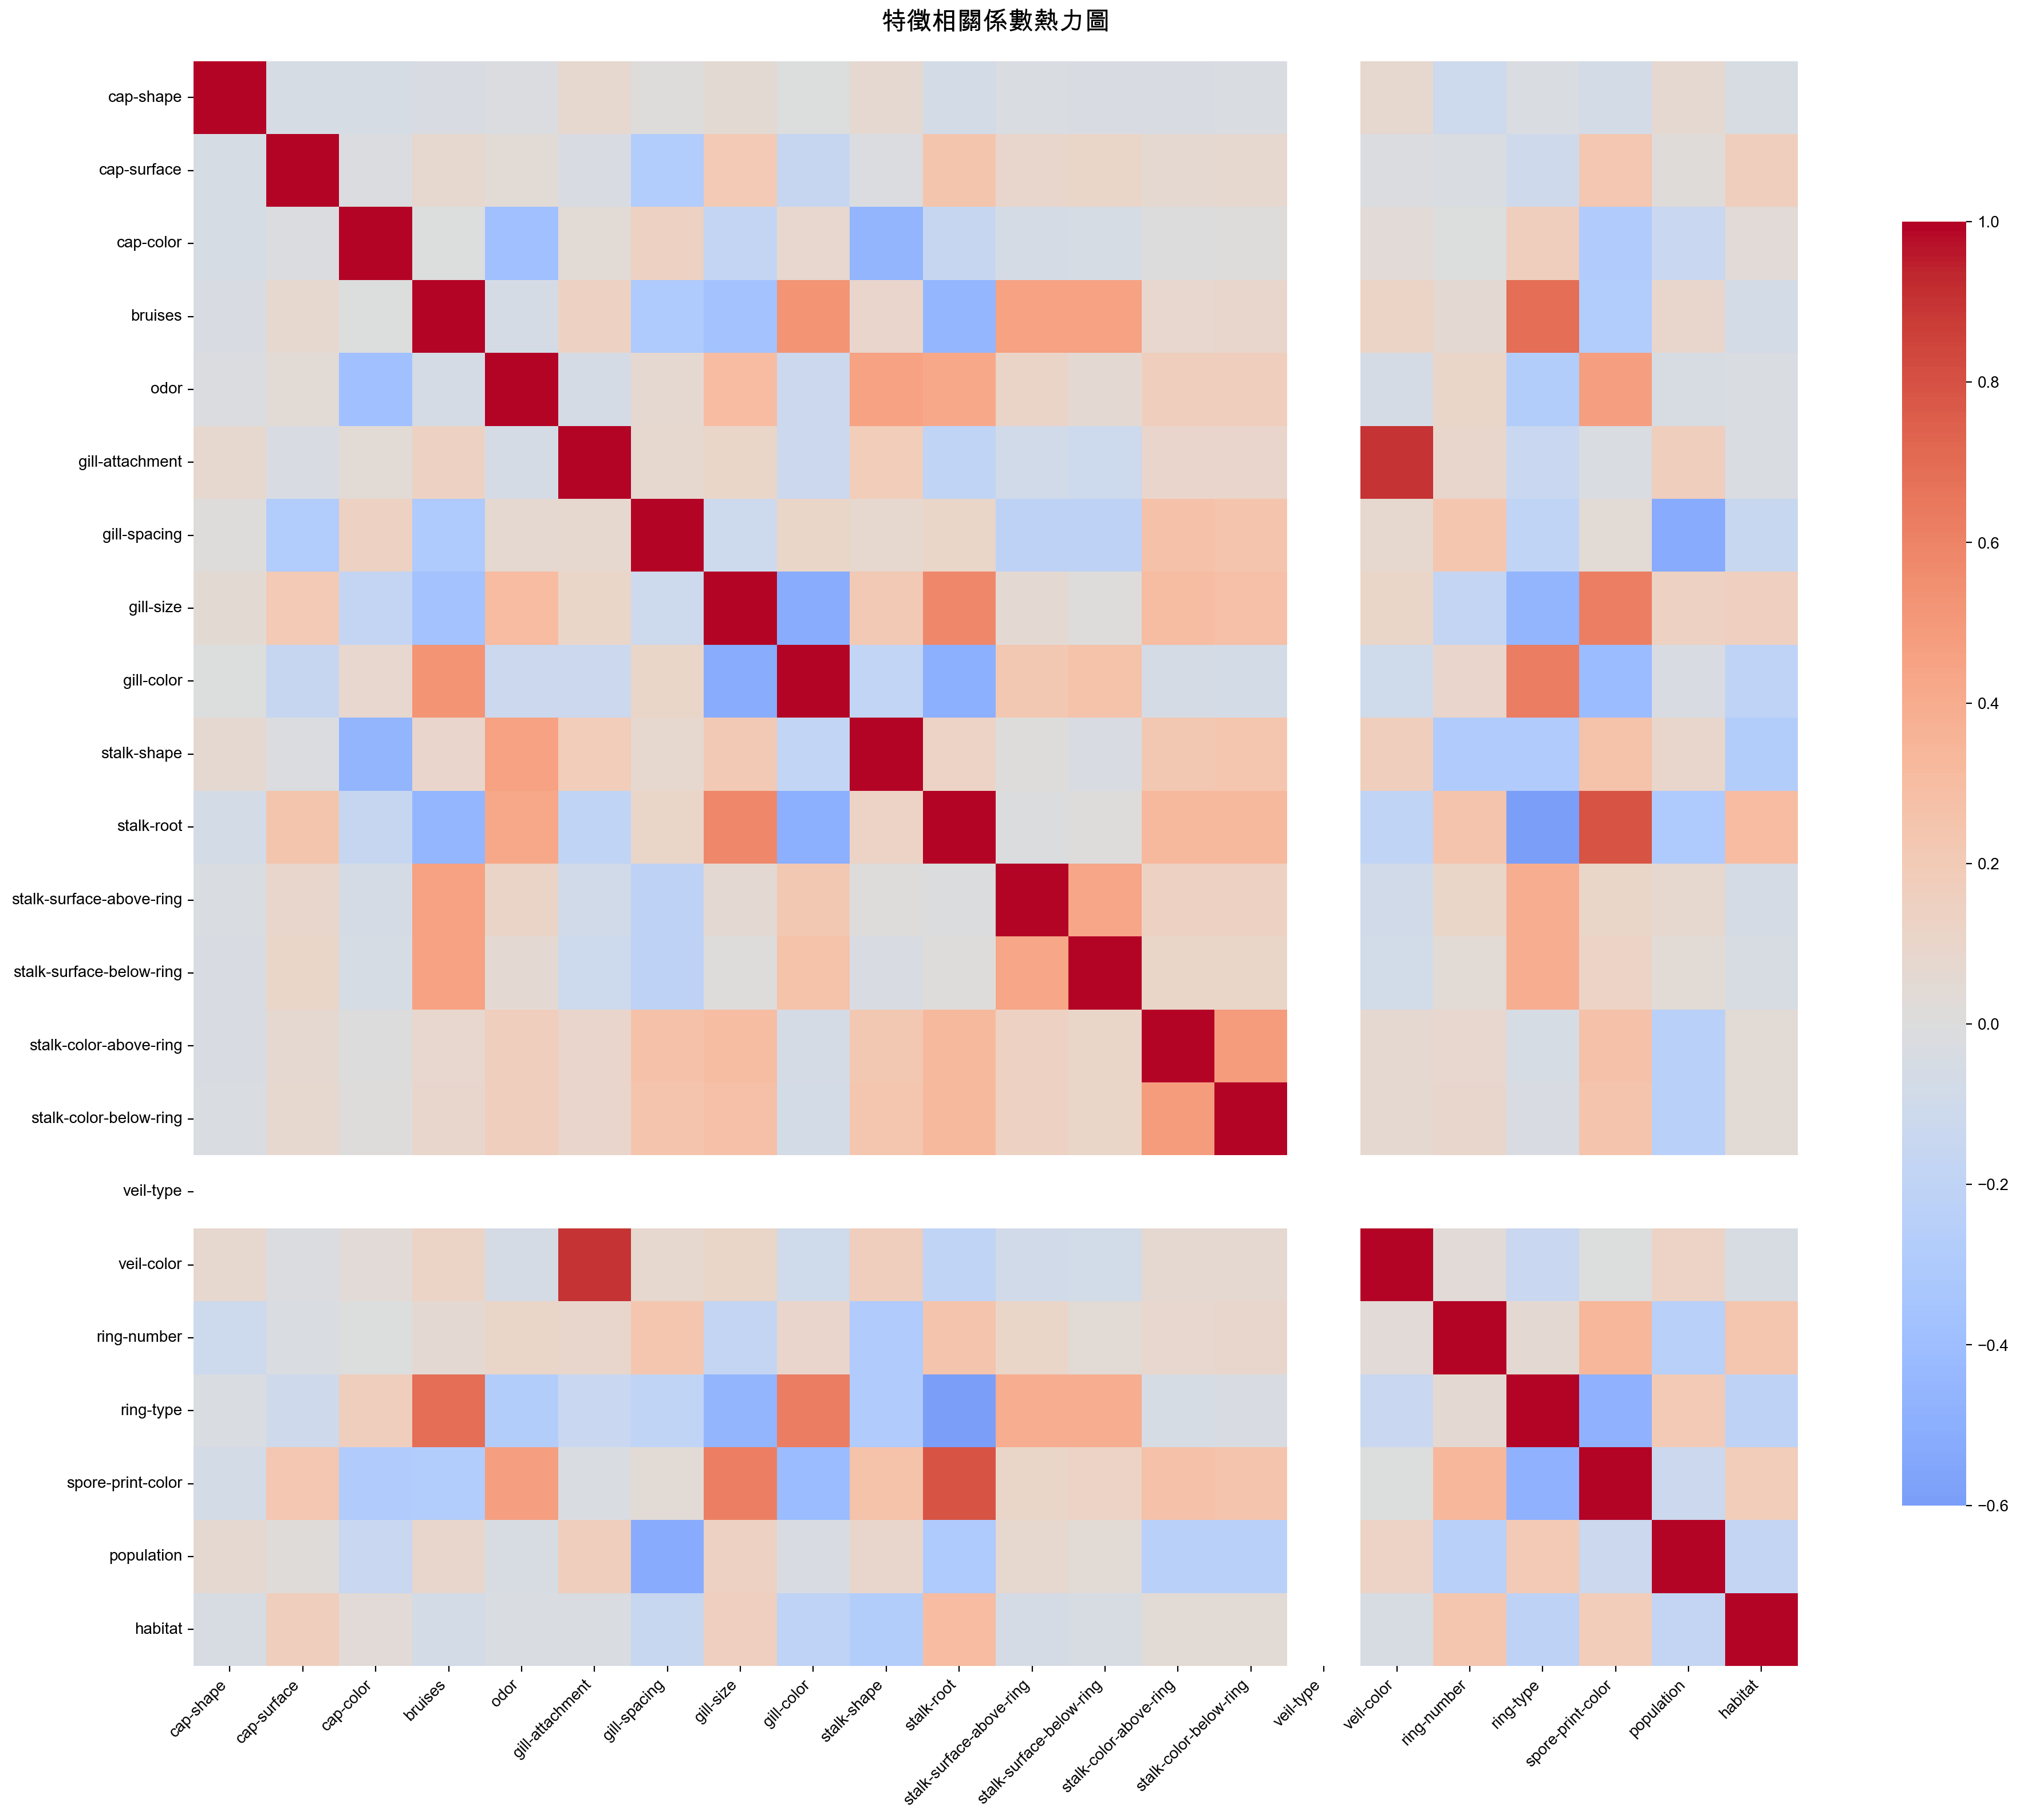

相關係數統計摘要：
相關係數範圍：nan 到 nan
平均相關係數：nan
相關係數標準差：nan

高相關性特徵對 (|r| > 0.5)：11 對
bruises vs gill-color: 0.527
bruises vs ring-type: 0.693
gill-attachment vs veil-color: 0.898
gill-spacing vs population: -0.529
gill-size vs gill-color: -0.517
gill-size vs stalk-root: 0.586
gill-size vs spore-print-color: 0.623
gill-color vs stalk-root: -0.504
gill-color vs ring-type: 0.629
stalk-root vs ring-type: -0.600


In [10]:
# 相關係數熱力圖
plt.figure(figsize=(20, 16))
correlation_matrix = X_encoded.corr()

# 繪製熱力圖
sns.heatmap(
    correlation_matrix,
    annot=False,  # 因為特徵太多，不顯示數值
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8},
)

plt.title("特徵相關係數熱力圖", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("相關係數統計摘要：")
# 取得相關係數的分布情況
corr_values = correlation_matrix.values
# 移除對角線元素（自相關=1）
corr_values = corr_values[~np.eye(corr_values.shape[0], dtype=bool)]
print(f"相關係數範圍：{corr_values.min():.3f} 到 {corr_values.max():.3f}")
print(f"平均相關係數：{corr_values.mean():.3f}")
print(f"相關係數標準差：{corr_values.std():.3f}")

# 找出高相關性的特徵對
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:  # 閾值設為0.5
            high_corr_pairs.append(
                (correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val)
            )

print(f"\n高相關性特徵對 (|r| > 0.5)：{len(high_corr_pairs)} 對")
for pair in high_corr_pairs[:10]:  # 只顯示前10對
    print(f"{pair[0]} vs {pair[1]}: {pair[2]:.3f}")


選擇前8個特徵進行散點圖矩陣分析：['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size']


<Figure size 1600x1600 with 0 Axes>

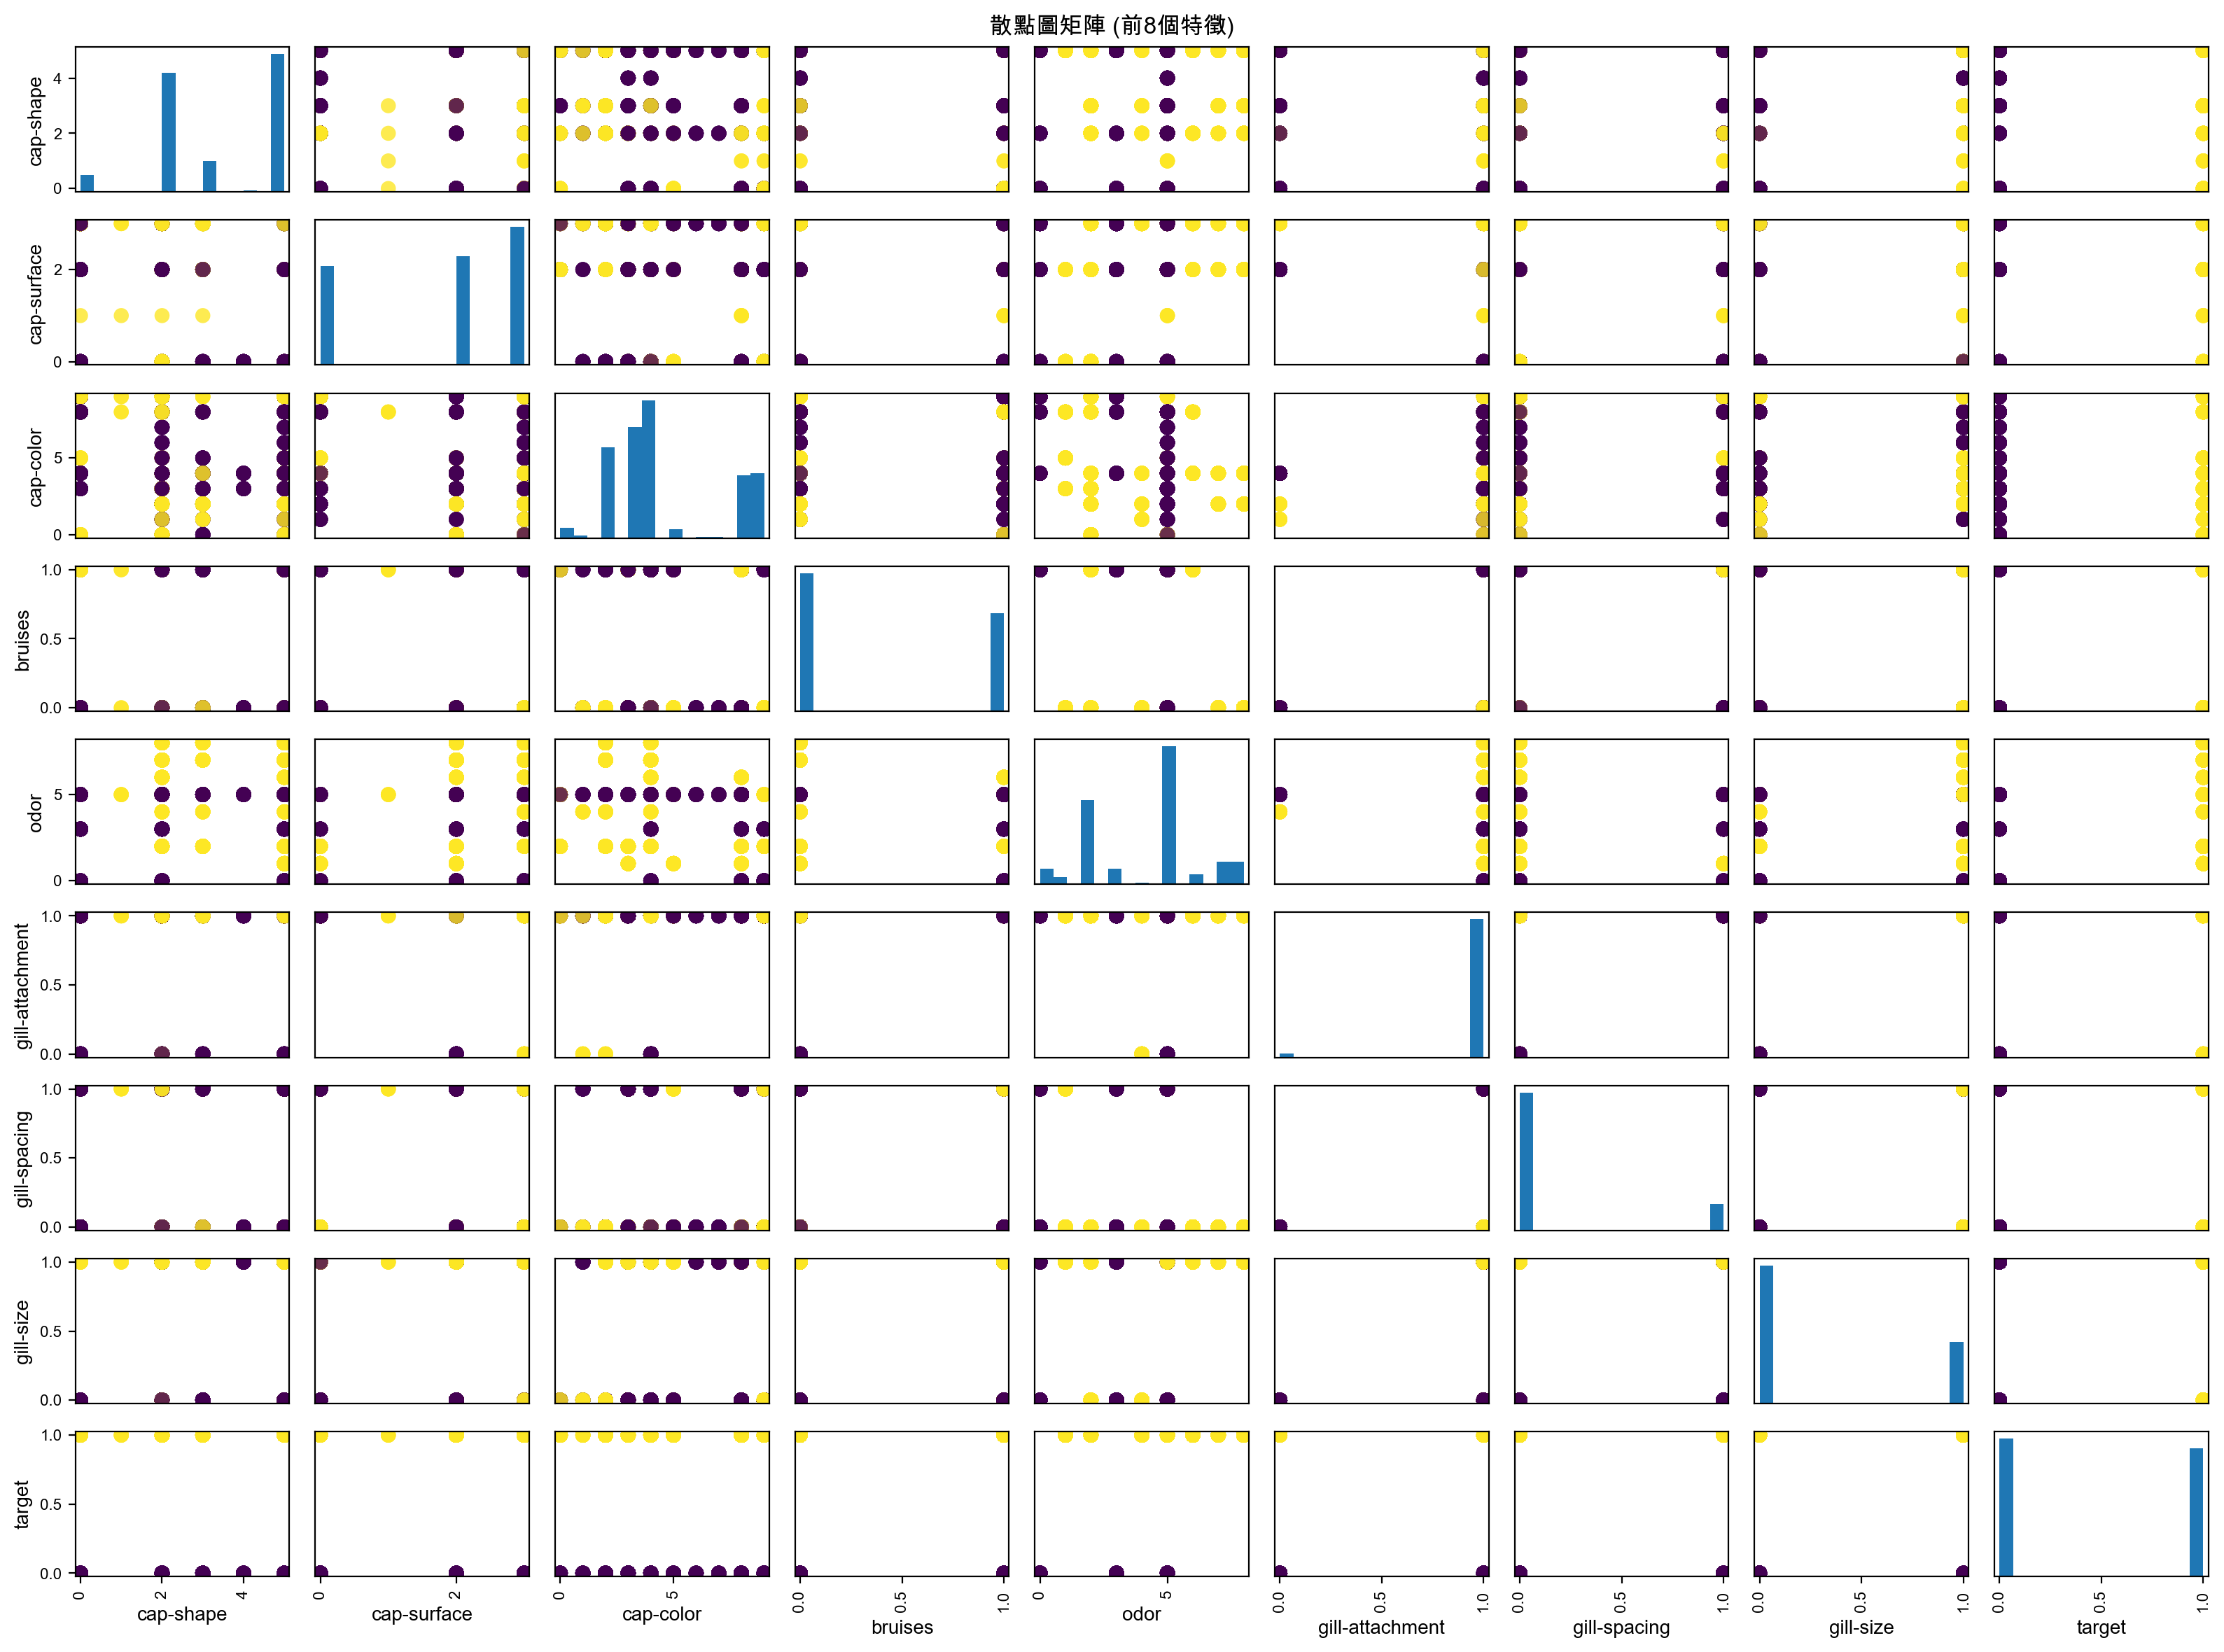


=== 特徵與目標變數的相關性 ===
與目標變數相關性最高的前10個特徵：
 1. gill-size:  0.540
 2. gill-color: -0.531
 3. bruises: -0.502
 4. ring-type: -0.412
 5. gill-spacing: -0.348
 6. stalk-surface-above-ring: -0.335
 7. stalk-surface-below-ring: -0.299
 8. population:  0.299
 9. habitat:  0.217
10. ring-number: -0.214

與目標變數相關性最低的5個特徵：
 1. stalk-shape: -0.102
 2. odor: -0.094
 3. cap-shape:  0.053
 4. cap-color: -0.031
 5. veil-type:    nan


/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [11]:
# 散點圖矩陣 - 選擇前8個特徵進行展示（因為特徵太多）
selected_features = X_encoded.columns[:8]
selected_data = X_encoded[selected_features].copy()
selected_data["target"] = y_encoded

print(f"選擇前8個特徵進行散點圖矩陣分析：{list(selected_features)}")

# 建立散點圖矩陣
plt.figure(figsize=(16, 16))
pd.plotting.scatter_matrix(
    selected_data,
    c=selected_data["target"],
    figsize=(16, 12),
    marker="o",
    hist_kwds={"bins": 15},
    s=60,
    alpha=0.8,
    diagonal="hist",
)

plt.suptitle("散點圖矩陣 (前8個特徵)")
plt.tight_layout()
plt.show()

# 特徵與目標變數的相關性
print("\n=== 特徵與目標變數的相關性 ===")
target_corr = X_encoded.corrwith(pd.Series(y_encoded))
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

print("與目標變數相關性最高的前10個特徵：")
for i, (feature, corr) in enumerate(target_corr_sorted.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {target_corr[feature]:6.3f}")

print(f"\n與目標變數相關性最低的5個特徵：")
for i, (feature, corr) in enumerate(target_corr_sorted.tail(5).items(), 1):
    print(f"{i:2d}. {feature}: {target_corr[feature]:6.3f}")


## Pre-Processing


In [12]:
from typing import Literal, Self
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin


class DropNullColumns(BaseEstimator, TransformerMixin):
    transform_type: None | Literal["default", "pandas"]

    def __init__(self, columns: list[str] | None = None):
        self.columns = columns
        self.transform_type = None

    def fit(self, X: pd.DataFrame, _: pd.Series | None = None) -> Self:
        self.null_columns = X.columns[X.isnull().any()]
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame | np.ndarray:
        dropped_X = X.drop(columns=self.null_columns)

        if self.transform_type == "pandas":
            return dropped_X
        else:
            return dropped_X.to_numpy()

    def set_output(
        self, *, transform: None | Literal["default", "pandas"] = None
    ) -> BaseEstimator:
        self.transform_type = transform
        return self


preprocessor = Pipeline(
    [
        # 缺失值處理
        ("drop_cols", DropNullColumns()),
        (
            "encode",
            ColumnTransformer(
                [
                    # label encoding for binary data
                    (
                        "binary",
                        OrdinalEncoder(),
                        [
                            "bruises",
                            "gill-attachment",
                            "gill-spacing",
                            "gill-size",
                            "stalk-shape",
                        ],
                    ),
                    # one-hot encoding for non-binary data
                    (
                        "onehot",
                        OneHotEncoder(dtype="int64", sparse_output=False),
                        [
                            "cap-shape",
                            "cap-surface",
                            "cap-color",
                            "odor",
                            "gill-color",
                            "stalk-surface-above-ring",
                            "stalk-surface-below-ring",
                            "stalk-color-above-ring",
                            "stalk-color-below-ring",
                            "veil-color",
                            "ring-number",
                            "ring-type",
                            "spore-print-color",
                            "population",
                            "habitat",
                        ],
                    ),
                ],
                n_jobs=-1,
            ),
        ),
        (
            "lda",
            LinearDiscriminantAnalysis(n_components=1),
        ),
        ("standardize", StandardScaler()),
    ],
)

preprocessor.set_output(transform="pandas")
preprocessor

Pipeline(steps=[('drop_cols', DropNullColumns()),
                ('encode',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('binary', OrdinalEncoder(),
                                                  ['bruises', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'stalk-shape']),
                                                 ('onehot',
                                                  OneHotEncoder(dtype='int64',
                                                                sparse_output=False),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'odor',
                                                   'gill-color',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('lda', LinearDiscriminantAnalysis(n_components=1)),
                ('standardize', StandardScaler())])

In [13]:
X_train_pp = preprocessor.fit_transform(X_train, y_train)
X_test_pp = preprocessor.transform(X_test)

## 建立模型

實作完整的八種機器學習算法：LR、DT、RF、SVM、KNN、XGB、Bagging、AdaBoost

### 算法說明：

1. **LR (Logistic Regression)**: 邏輯回歸，線性分類器
2. **DT (Decision Tree)**: 決策樹，基於樹狀結構的分類器
3. **RF (Random Forest)**: 隨機森林，多個決策樹的集成學習
4. **SVM (Support Vector Machine)**: 支持向量機，基於核函數的分類器
5. **KNN (K-Nearest Neighbors)**: K 最近鄰，基於距離的分類器
6. **XGB (XGBoost)**: 極端梯度提升，基於梯度提升的集成學習
7. **Bagging**: 裝袋法，多個弱學習器的並行集成
8. **AdaBoost**: 自適應提升，多個弱學習器的串行集成

### 參數設定：

- DT 使用之前 GridSearchCV 找出的最佳參數：`{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}`
- RF 使用之前 GridSearchCV 找出的最佳參數：`{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}`
- SVM 使用 RBF 核函數，開啟概率預測
- KNN 使用 k=5，uniform 權重
- XGBoost 使用默認參數，添加 eval_metric='logloss'
- Bagging 和 AdaBoost 都以決策樹為基學習器

### KFold 設定：

- 使用 K-Fold 交叉驗證來獲得更穩健的模型性能評估，減少因為特定訓練/測試集分割造成的偏差。
- 採 5 折

### 環境要求：

- macOS 需要安裝 `libomp` 才能執行 XGBoost：`brew install libomp`


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  # brew install libomp
from sklearn.model_selection import cross_val_score

assert X_train_pp is not None
assert isinstance(X_train_pp, pd.DataFrame)


# 最佳參數設定
dt_best_params = {
    "criterion": "gini",
    "max_depth": None,
    "min_samples_leaf": 1,
    "min_samples_split": 10,
}
rf_best_params = {
    "max_depth": None,
    "min_samples_leaf": 1,
    "min_samples_split": 5,
    "n_estimators": 100,
}

# 建立分類器實例
lr_classifier = LogisticRegression(random_state=42, max_iter=1000, solver="liblinear")
dt_classifier = DecisionTreeClassifier(random_state=42, **dt_best_params)
rf_classifier = RandomForestClassifier(random_state=42, **rf_best_params)
svm_classifier = SVC(
    random_state=42, probability=True, kernel="rbf", C=1.0, gamma="scale"
)
knn_classifier = KNeighborsClassifier(
    n_neighbors=5, weights="uniform", algorithm="auto"
)
xgb_classifier = XGBClassifier(random_state=42, eval_metric="logloss")
bagging_classifier = BaggingClassifier(
    estimator=dt_classifier, random_state=42, n_estimators=10
)
adaboost_classifier = AdaBoostClassifier(
    estimator=dt_classifier, random_state=42, n_estimators=50, learning_rate=1.0
)

# 所有算法列表
algorithms = [
    lr_classifier,
    dt_classifier,
    rf_classifier,
    svm_classifier,
    knn_classifier,
    xgb_classifier,
    bagging_classifier,
    adaboost_classifier,
]

classifiers: dict[str, Pipeline] = {}

cv = 10

for algorithm in algorithms:
    # 每個 model 結尾都有 Classifier，這個我們需要移除掉
    model_name = algorithm.__class__.__name__
    if model_name.endswith("Classifier"):
        model_name = model_name[: -len("Classifier")]

    # 特殊處理一些模型名稱
    if model_name == "LogisticRegression":
        model_name = "LR"
    elif model_name == "SVC":
        model_name = "SVM"
    elif model_name == "KNeighbors":
        model_name = "KNN"
    elif model_name == "XGB":
        model_name = "XGBoost"

    algorithm.fit(X_train_pp, y_train)

    scores = cross_val_score(
        algorithm,
        X_train_pp.to_numpy(),
        y_train,
        cv=cv,
        scoring="accuracy",
        error_score="raise",
    )
    print(
        f"{model_name} 在 train set 的 {cv=} 準確率：{scores.mean():.4f} ± {scores.std():.4f}"
    )
    classifiers[model_name] = algorithm


LR 在 train set 的 cv=10 準確率：0.9998 ± 0.0005
DecisionTree 在 train set 的 cv=10 準確率：0.9998 ± 0.0005
RandomForest 在 train set 的 cv=10 準確率：0.9998 ± 0.0005
SVM 在 train set 的 cv=10 準確率：0.9998 ± 0.0005
KNN 在 train set 的 cv=10 準確率：0.9998 ± 0.0005
XGBoost 在 train set 的 cv=10 準確率：0.9985 ± 0.0024
Bagging 在 train set 的 cv=10 準確率：0.9998 ± 0.0005
AdaBoost 在 train set 的 cv=10 準確率：0.9998 ± 0.0005


## 針對每個模型做混淆矩陣


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrixes = {
    name: confusion_matrix(y_test, algorithm.predict(X_test_pp))
    for name, algorithm in classifiers.items()
}

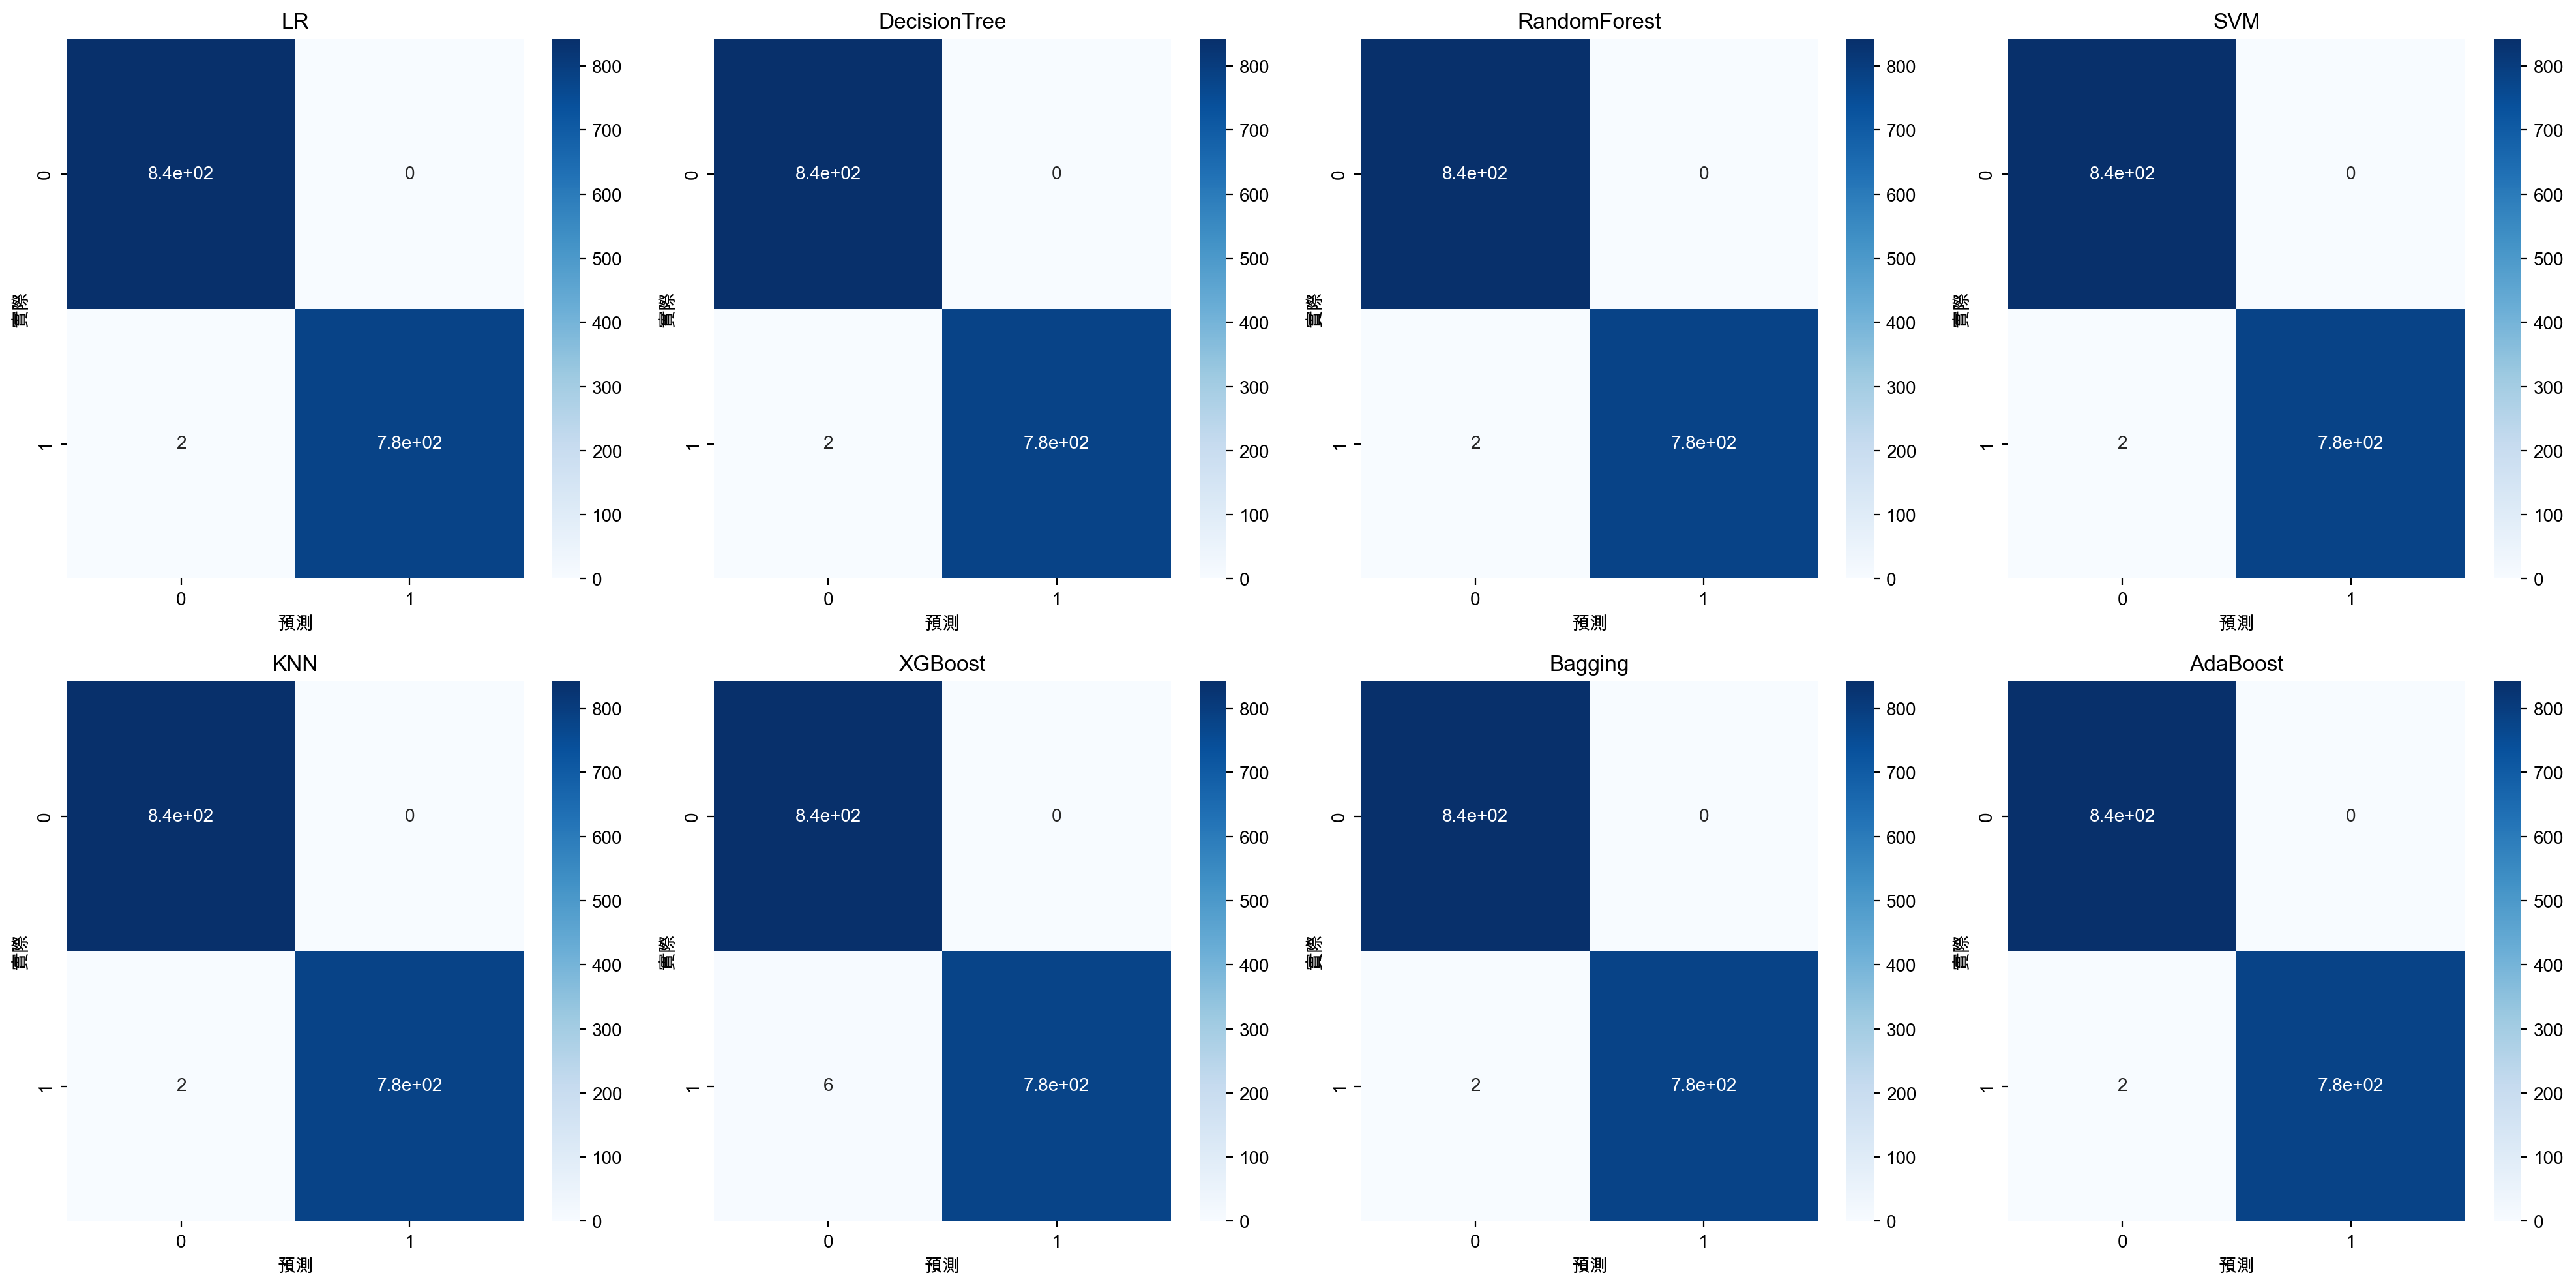

In [16]:
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for idx, (name, matrix) in enumerate(confusion_matrixes.items()):
    row = idx // 4
    col = idx % 4
    sns.heatmap(matrix, annot=True, cmap="Blues", ax=ax[row, col])
    ax[row, col].set_title(name)
    ax[row, col].set_xlabel("預測")
    ax[row, col].set_ylabel("實際")

fig.tight_layout()
plt.show()


## 測出 Accuracy、Precision、Recall 和 F1


In [17]:
from sklearn.metrics import (
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
)
from imblearn.metrics import specificity_score

scorers = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "Specificity": make_scorer(specificity_score),
    "F1": make_scorer(f1_score),
    "AUC": make_scorer(roc_auc_score),
}

scores = [
    {
        "Model": name,
        **{
            scorer_name: scorer(classifier, X_test_pp, y_test)
            for scorer_name, scorer in scorers.items()
        },
    }
    for name, classifier in classifiers.items()
]

results_df = pd.DataFrame(scores)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
results_df.set_index("Model", inplace=True)

results_df

,Accuracy,Precision,Recall,Specificity,F1,AUC
Model,,,,,,
LR,0.998769,1.0,0.997446,1.0,0.998721,0.998723
DecisionTree,0.998769,1.0,0.997446,1.0,0.998721,0.998723
RandomForest,0.998769,1.0,0.997446,1.0,0.998721,0.998723
SVM,0.998769,1.0,0.997446,1.0,0.998721,0.998723
KNN,0.998769,1.0,0.997446,1.0,0.998721,0.998723
Bagging,0.998769,1.0,0.997446,1.0,0.998721,0.998723
AdaBoost,0.998769,1.0,0.997446,1.0,0.998721,0.998723
XGBoost,0.996308,1.0,0.992337,1.0,0.996154,0.996169


In [18]:
# K-Fold Cross-Validation Evaluation with cv=10
from sklearn.metrics import (
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
)
from imblearn.metrics import specificity_score
from sklearn.model_selection import cross_val_score

scorers = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "Specificity": make_scorer(specificity_score),
    "F1": make_scorer(f1_score),
    "AUC": make_scorer(roc_auc_score),
}

scores = []
for name, classifier in classifiers.items():
    score_dict = {"Model": name}
    for scorer_name, scorer in scorers.items():
        # Use K-Fold cross-validation with cv=10
        cv_scores = cross_val_score(
            classifier, X_train_pp, y_train, cv=10, scoring=scorer, n_jobs=-1
        )
        score_dict[scorer_name] = f"{cv_scores.mean():.4f} ± {cv_scores.std():.4f}"
    scores.append(score_dict)

results_df_kfold = pd.DataFrame(scores)
results_df_kfold.sort_values(by="Accuracy", ascending=False, inplace=True)
results_df_kfold.set_index("Model", inplace=True)

print("=== K-Fold Cross-Validation Results (cv=10) ===")
results_df_kfold

=== K-Fold Cross-Validation Results (cv=10) ===


,Accuracy,Precision,Recall,Specificity,F1,AUC
Model,,,,,,
LR,0.9998 ± 0.0005,1.0000 ± 0.0000,0.9997 ± 0.0010,1.0000 ± 0.0000,0.9998 ± 0.0005,0.9998 ± 0.0005
DecisionTree,0.9998 ± 0.0005,1.0000 ± 0.0000,0.9997 ± 0.0010,1.0000 ± 0.0000,0.9998 ± 0.0005,0.9998 ± 0.0005
RandomForest,0.9998 ± 0.0005,1.0000 ± 0.0000,0.9997 ± 0.0010,1.0000 ± 0.0000,0.9998 ± 0.0005,0.9998 ± 0.0005
SVM,0.9998 ± 0.0005,1.0000 ± 0.0000,0.9997 ± 0.0010,1.0000 ± 0.0000,0.9998 ± 0.0005,0.9998 ± 0.0005
KNN,0.9998 ± 0.0005,1.0000 ± 0.0000,0.9997 ± 0.0010,1.0000 ± 0.0000,0.9998 ± 0.0005,0.9998 ± 0.0005
Bagging,0.9998 ± 0.0005,1.0000 ± 0.0000,0.9997 ± 0.0010,1.0000 ± 0.0000,0.9998 ± 0.0005,0.9998 ± 0.0005
AdaBoost,0.9998 ± 0.0005,1.0000 ± 0.0000,0.9997 ± 0.0010,1.0000 ± 0.0000,0.9998 ± 0.0005,0.9998 ± 0.0005
XGBoost,0.9985 ± 0.0024,1.0000 ± 0.0000,0.9968 ± 0.0049,1.0000 ± 0.0000,0.9984 ± 0.0025,0.9984 ± 0.0025


## ROC 曲線與 AUC


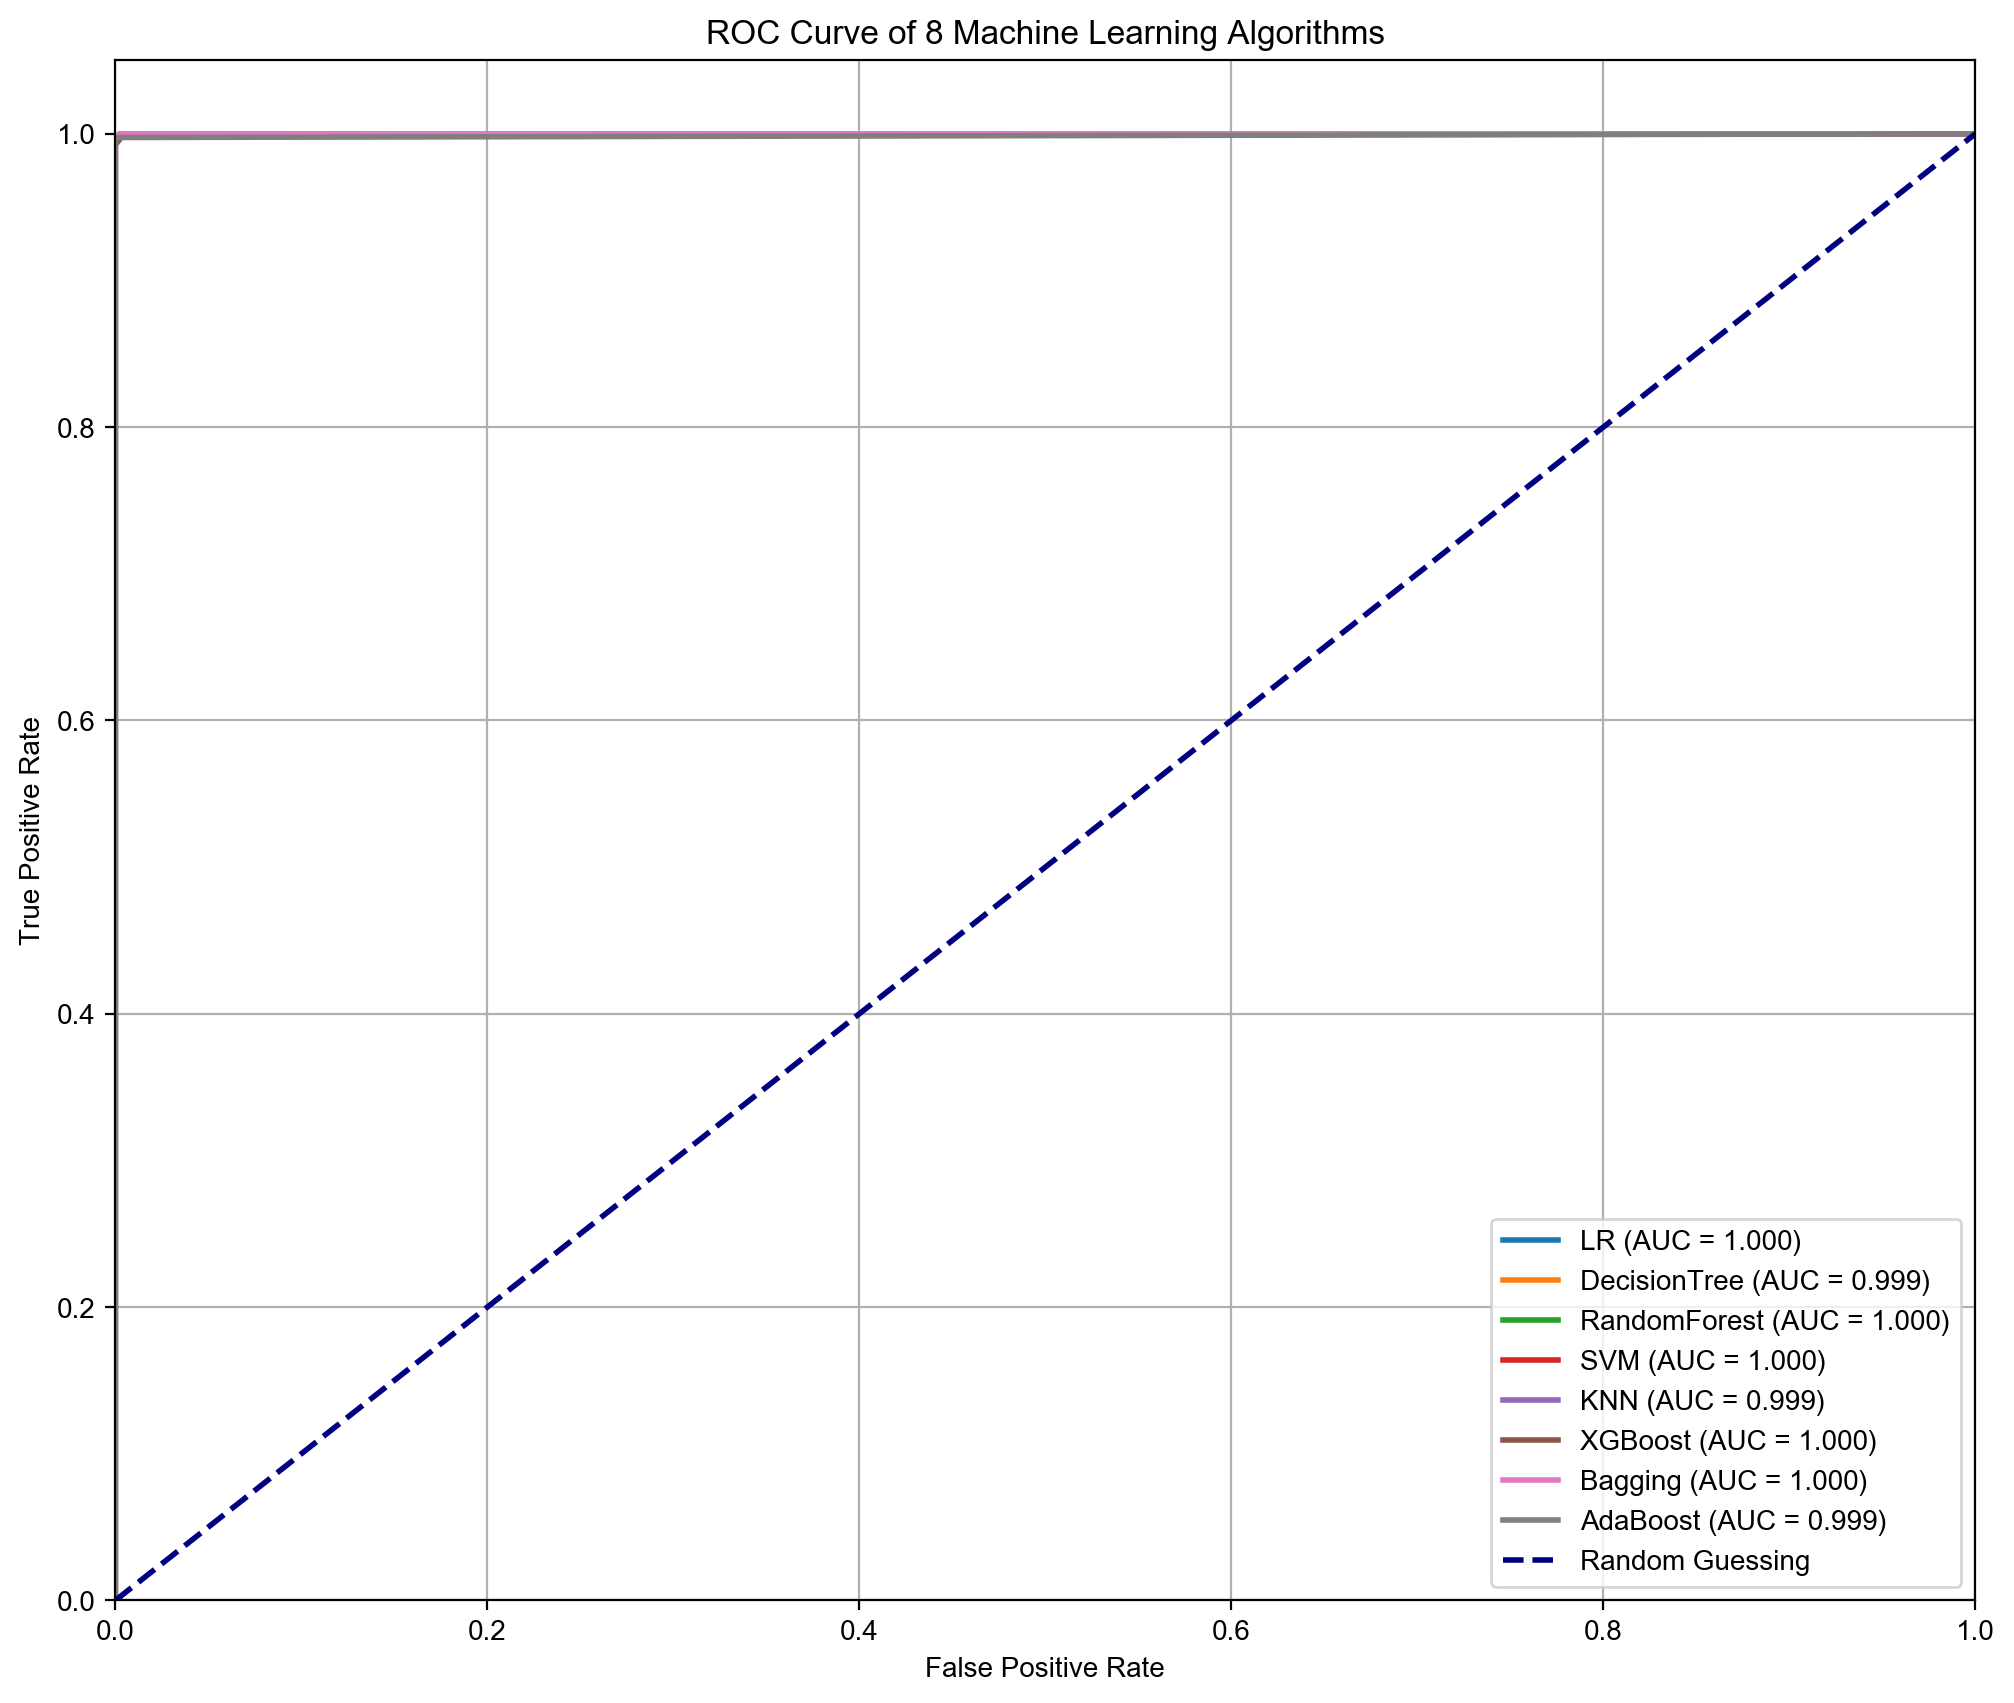

In [19]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 10))

for name, classifier in classifiers.items():
    # Get probability estimates for the positive class
    if hasattr(classifier, "predict_proba"):
        y_score = classifier.predict_proba(X_test_pp)[:, 1]
    else:
        # For classifiers without predict_proba (e.g., SVM with probability=False)
        y_score = classifier.decision_function(X_test_pp)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of 8 Machine Learning Algorithms")
plt.legend(loc="lower right", bbox_to_anchor=(1.0, 0.0))
plt.grid(True)
plt.show()

In [20]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# 儲存最佳化前的結果
before_optimization = results_df.copy()
print("=== 最佳化前模型性能 ===")
before_optimization.round(4)


=== 最佳化前模型性能 ===


/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Accuracy,Precision,Recall,Specificity,F1,AUC
Model,,,,,,
LR,0.9988,1.0,0.9974,1.0,0.9987,0.9987
DecisionTree,0.9988,1.0,0.9974,1.0,0.9987,0.9987
RandomForest,0.9988,1.0,0.9974,1.0,0.9987,0.9987
SVM,0.9988,1.0,0.9974,1.0,0.9987,0.9987
KNN,0.9988,1.0,0.9974,1.0,0.9987,0.9987
Bagging,0.9988,1.0,0.9974,1.0,0.9987,0.9987
AdaBoost,0.9988,1.0,0.9974,1.0,0.9987,0.9987
XGBoost,0.9963,1.0,0.9923,1.0,0.9962,0.9962


In [21]:
# 定義 RandomForest 最佳化目標函數
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 10, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        criterion=criterion,
        random_state=42,
        n_jobs=-1,
    )

    # 使用F1分數作為最佳化目標
    scores = cross_val_score(model, X_train_pp, y_train, cv=5, scoring="f1", n_jobs=-1)
    return scores.mean()


# 最佳化 Random Forest
print("最佳化 Random Forest...")
study_rf = optuna.create_study(
    direction="maximize", sampler=optuna.samplers.TPESampler(seed=42)
)
study_rf.optimize(objective_rf, n_trials=100, show_progress_bar=True)

print(f"Best F1 score: {study_rf.best_value:.6f}")
print(f"Best parameters: {study_rf.best_params}")

# 使用最佳參數訓練模型
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train_pp, y_train)


[I 2025-06-10 11:08:05,653] A new study created in memory with name: no-name-4f2c0085-83c3-49f0-b8c4-77794fe128f5


最佳化 Random Forest...


Best trial: 0. Best value: 0.99984:   1%|          | 1/100 [00:00<00:46,  2.14it/s]

[I 2025-06-10 11:08:06,120] Trial 0 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:   2%|▏         | 2/100 [00:01<01:15,  1.30it/s]

[I 2025-06-10 11:08:07,105] Trial 1 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 973, 'max_depth': 44, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:   3%|▎         | 3/100 [00:01<00:56,  1.70it/s]

[I 2025-06-10 11:08:07,472] Trial 2 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 363, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:   4%|▍         | 4/100 [00:02<01:03,  1.50it/s]

[I 2025-06-10 11:08:08,257] Trial 3 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 954, 'max_depth': 49, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:   5%|▌         | 5/100 [00:02<00:50,  1.86it/s]

[I 2025-06-10 11:08:08,565] Trial 4 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 333, 'max_depth': 37, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:   6%|▌         | 6/100 [00:03<01:06,  1.42it/s]

[I 2025-06-10 11:08:09,602] Trial 5 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 930, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:   8%|▊         | 8/100 [00:04<00:40,  2.27it/s]

[I 2025-06-10 11:08:09,876] Trial 6 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 226, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:10,051] Trial 7 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 166, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  10%|█         | 10/100 [00:05<00:39,  2.30it/s]

[I 2025-06-10 11:08:10,823] Trial 8 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 899, 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:11,010] Trial 9 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 197, 'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  11%|█         | 11/100 [00:06<00:44,  1.99it/s]

[I 2025-06-10 11:08:11,665] Trial 10 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 599, 'max_depth': 38, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  12%|█▏        | 12/100 [00:06<00:48,  1.80it/s]

[I 2025-06-10 11:08:12,341] Trial 11 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 645, 'max_depth': 50, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  13%|█▎        | 13/100 [00:07<00:54,  1.59it/s]

[I 2025-06-10 11:08:13,144] Trial 12 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 768, 'max_depth': 44, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  14%|█▍        | 14/100 [00:08<00:51,  1.68it/s]

[I 2025-06-10 11:08:13,656] Trial 13 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 475, 'max_depth': 35, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  15%|█▌        | 15/100 [00:08<00:47,  1.79it/s]

[I 2025-06-10 11:08:14,136] Trial 14 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 457, 'max_depth': 46, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  16%|█▌        | 16/100 [00:09<00:51,  1.63it/s]

[I 2025-06-10 11:08:14,880] Trial 15 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 717, 'max_depth': 42, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  17%|█▋        | 17/100 [00:10<00:56,  1.48it/s]

[I 2025-06-10 11:08:15,696] Trial 16 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 809, 'max_depth': 32, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  18%|█▊        | 18/100 [00:10<00:51,  1.59it/s]

[I 2025-06-10 11:08:16,220] Trial 17 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 504, 'max_depth': 40, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  19%|█▉        | 19/100 [00:10<00:44,  1.81it/s]

[I 2025-06-10 11:08:16,588] Trial 18 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 329, 'max_depth': 47, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  20%|██        | 20/100 [00:11<00:47,  1.70it/s]

[I 2025-06-10 11:08:17,262] Trial 19 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 640, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  21%|██        | 21/100 [00:12<00:56,  1.40it/s]

[I 2025-06-10 11:08:18,268] Trial 20 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 998, 'max_depth': 34, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  22%|██▏       | 22/100 [00:12<00:46,  1.68it/s]

[I 2025-06-10 11:08:18,585] Trial 21 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 367, 'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  24%|██▍       | 24/100 [00:13<00:30,  2.48it/s]

[I 2025-06-10 11:08:18,935] Trial 22 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 411, 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:19,066] Trial 23 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 110, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  25%|██▌       | 25/100 [00:13<00:27,  2.74it/s]

[I 2025-06-10 11:08:19,338] Trial 24 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 294, 'max_depth': 25, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  26%|██▌       | 26/100 [00:14<00:31,  2.33it/s]

[I 2025-06-10 11:08:19,917] Trial 25 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 549, 'max_depth': 31, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  27%|██▋       | 27/100 [00:14<00:27,  2.68it/s]

[I 2025-06-10 11:08:20,162] Trial 26 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 268, 'max_depth': 44, 'min_samples_split': 13, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  28%|██▊       | 28/100 [00:14<00:29,  2.48it/s]

[I 2025-06-10 11:08:20,633] Trial 27 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 436, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  29%|██▉       | 29/100 [00:15<00:30,  2.37it/s]

[I 2025-06-10 11:08:21,102] Trial 28 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 541, 'max_depth': 47, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  30%|███       | 30/100 [00:16<00:36,  1.94it/s]

[I 2025-06-10 11:08:21,834] Trial 29 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 849, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  31%|███       | 31/100 [00:16<00:33,  2.05it/s]

[I 2025-06-10 11:08:22,258] Trial 30 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 380, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  32%|███▏      | 32/100 [00:17<00:39,  1.72it/s]

[I 2025-06-10 11:08:23,057] Trial 31 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 950, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  33%|███▎      | 33/100 [00:18<00:41,  1.62it/s]

[I 2025-06-10 11:08:23,764] Trial 32 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 866, 'max_depth': 38, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  34%|███▍      | 34/100 [00:18<00:40,  1.61it/s]

[I 2025-06-10 11:08:24,389] Trial 33 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 726, 'max_depth': 46, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  35%|███▌      | 35/100 [00:19<00:44,  1.46it/s]

[I 2025-06-10 11:08:25,222] Trial 34 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 957, 'max_depth': 41, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  36%|███▌      | 36/100 [00:20<00:45,  1.42it/s]

[I 2025-06-10 11:08:25,975] Trial 35 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 904, 'max_depth': 44, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  37%|███▋      | 37/100 [00:21<00:48,  1.30it/s]

[I 2025-06-10 11:08:26,891] Trial 36 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 995, 'max_depth': 49, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  38%|███▊      | 38/100 [00:21<00:39,  1.57it/s]

[I 2025-06-10 11:08:27,225] Trial 37 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 292, 'max_depth': 36, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  39%|███▉      | 39/100 [00:21<00:31,  1.96it/s]

[I 2025-06-10 11:08:27,437] Trial 38 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 226, 'max_depth': 39, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  40%|████      | 40/100 [00:22<00:33,  1.81it/s]

[I 2025-06-10 11:08:28,086] Trial 39 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 597, 'max_depth': 48, 'min_samples_split': 11, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  41%|████      | 41/100 [00:23<00:34,  1.70it/s]

[I 2025-06-10 11:08:28,759] Trial 40 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 841, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  42%|████▏     | 42/100 [00:23<00:29,  1.97it/s]

[I 2025-06-10 11:08:29,083] Trial 41 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 374, 'max_depth': 43, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  43%|████▎     | 43/100 [00:23<00:26,  2.17it/s]

[I 2025-06-10 11:08:29,430] Trial 42 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 337, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  44%|████▍     | 44/100 [00:24<00:24,  2.25it/s]

[I 2025-06-10 11:08:29,836] Trial 43 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 485, 'max_depth': 37, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  45%|████▌     | 45/100 [00:24<00:21,  2.59it/s]

[I 2025-06-10 11:08:30,086] Trial 44 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 218, 'max_depth': 33, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  46%|████▌     | 46/100 [00:24<00:22,  2.45it/s]

[I 2025-06-10 11:08:30,546] Trial 45 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 414, 'max_depth': 26, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  47%|████▋     | 47/100 [00:25<00:25,  2.10it/s]

[I 2025-06-10 11:08:31,179] Trial 46 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 780, 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  48%|████▊     | 48/100 [00:25<00:21,  2.37it/s]

[I 2025-06-10 11:08:31,477] Trial 47 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 266, 'max_depth': 42, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  49%|████▉     | 49/100 [00:26<00:18,  2.77it/s]

[I 2025-06-10 11:08:31,693] Trial 48 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 156, 'max_depth': 23, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  50%|█████     | 50/100 [00:26<00:19,  2.56it/s]

[I 2025-06-10 11:08:32,156] Trial 49 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 511, 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  51%|█████     | 51/100 [00:26<00:18,  2.62it/s]

[I 2025-06-10 11:08:32,518] Trial 50 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 330, 'max_depth': 29, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  52%|█████▏    | 52/100 [00:27<00:26,  1.82it/s]

[I 2025-06-10 11:08:33,458] Trial 51 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 930, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  53%|█████▎    | 53/100 [00:28<00:30,  1.53it/s]

[I 2025-06-10 11:08:34,353] Trial 52 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 873, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  54%|█████▍    | 54/100 [00:29<00:33,  1.36it/s]

[I 2025-06-10 11:08:35,282] Trial 53 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 918, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  55%|█████▌    | 55/100 [00:30<00:36,  1.23it/s]

[I 2025-06-10 11:08:36,275] Trial 54 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 963, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  56%|█████▌    | 56/100 [00:31<00:35,  1.23it/s]

[I 2025-06-10 11:08:37,090] Trial 55 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 806, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  57%|█████▋    | 57/100 [00:31<00:29,  1.45it/s]

[I 2025-06-10 11:08:37,486] Trial 56 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 432, 'max_depth': 45, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  58%|█████▊    | 58/100 [00:32<00:29,  1.42it/s]

[I 2025-06-10 11:08:38,227] Trial 57 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 721, 'max_depth': 18, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  59%|█████▉    | 59/100 [00:33<00:30,  1.36it/s]

[I 2025-06-10 11:08:39,044] Trial 58 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 998, 'max_depth': 34, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  60%|██████    | 60/100 [00:34<00:28,  1.38it/s]

[I 2025-06-10 11:08:39,732] Trial 59 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 656, 'max_depth': 46, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  62%|██████▏   | 62/100 [00:34<00:19,  1.95it/s]

[I 2025-06-10 11:08:40,248] Trial 60 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 593, 'max_depth': 31, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:40,417] Trial 61 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 124, 'max_depth': 43, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  63%|██████▎   | 63/100 [00:35<00:17,  2.11it/s]

[I 2025-06-10 11:08:40,802] Trial 62 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 353, 'max_depth': 48, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  64%|██████▍   | 64/100 [00:35<00:15,  2.35it/s]

[I 2025-06-10 11:08:41,112] Trial 63 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 256, 'max_depth': 42, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  65%|██████▌   | 65/100 [00:35<00:14,  2.47it/s]

[I 2025-06-10 11:08:41,468] Trial 64 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 298, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  66%|██████▌   | 66/100 [00:36<00:11,  2.88it/s]

[I 2025-06-10 11:08:41,682] Trial 65 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 168, 'max_depth': 50, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  67%|██████▋   | 67/100 [00:36<00:12,  2.71it/s]

[I 2025-06-10 11:08:42,104] Trial 66 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 455, 'max_depth': 47, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  68%|██████▊   | 68/100 [00:37<00:16,  1.90it/s]

[I 2025-06-10 11:08:42,993] Trial 67 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 877, 'max_depth': 45, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  69%|██████▉   | 69/100 [00:37<00:14,  2.21it/s]

[I 2025-06-10 11:08:43,277] Trial 68 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 300, 'max_depth': 36, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  70%|███████   | 70/100 [00:38<00:13,  2.24it/s]

[I 2025-06-10 11:08:43,705] Trial 69 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 399, 'max_depth': 38, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  72%|███████▏  | 72/100 [00:39<00:12,  2.23it/s]

[I 2025-06-10 11:08:44,525] Trial 70 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 964, 'max_depth': 27, 'min_samples_split': 13, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:44,716] Trial 71 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 181, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  74%|███████▍  | 74/100 [00:39<00:08,  3.17it/s]

[I 2025-06-10 11:08:44,960] Trial 72 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 225, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:45,108] Trial 73 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 134, 'max_depth': 49, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  76%|███████▌  | 76/100 [00:40<00:09,  2.66it/s]

[I 2025-06-10 11:08:45,882] Trial 74 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 935, 'max_depth': 27, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:46,079] Trial 75 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 202, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  78%|███████▊  | 78/100 [00:41<00:08,  2.58it/s]

[I 2025-06-10 11:08:46,830] Trial 76 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 899, 'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:46,980] Trial 77 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 102, 'max_depth': 41, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  79%|███████▉  | 79/100 [00:41<00:07,  2.90it/s]

[I 2025-06-10 11:08:47,226] Trial 78 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 245, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  80%|████████  | 80/100 [00:42<00:08,  2.47it/s]

[I 2025-06-10 11:08:47,771] Trial 79 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 519, 'max_depth': 47, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  81%|████████  | 81/100 [00:42<00:07,  2.69it/s]

[I 2025-06-10 11:08:48,067] Trial 80 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 315, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  82%|████████▏ | 82/100 [00:43<00:09,  1.97it/s]

[I 2025-06-10 11:08:48,889] Trial 81 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 976, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  83%|████████▎ | 83/100 [00:44<00:10,  1.70it/s]

[I 2025-06-10 11:08:49,667] Trial 82 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 892, 'max_depth': 34, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  84%|████████▍ | 84/100 [00:44<00:08,  1.95it/s]

[I 2025-06-10 11:08:50,001] Trial 83 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 357, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  85%|████████▌ | 85/100 [00:44<00:06,  2.17it/s]

[I 2025-06-10 11:08:50,342] Trial 84 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 389, 'max_depth': 31, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  86%|████████▌ | 86/100 [00:45<00:08,  1.66it/s]

[I 2025-06-10 11:08:51,277] Trial 85 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 917, 'max_depth': 49, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  87%|████████▋ | 87/100 [00:46<00:08,  1.52it/s]

[I 2025-06-10 11:08:52,056] Trial 86 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 851, 'max_depth': 29, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  88%|████████▊ | 88/100 [00:46<00:06,  1.81it/s]

[I 2025-06-10 11:08:52,369] Trial 87 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 277, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  89%|████████▉ | 89/100 [00:47<00:06,  1.58it/s]

[I 2025-06-10 11:08:53,187] Trial 88 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 941, 'max_depth': 43, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  90%|█████████ | 90/100 [00:48<00:07,  1.34it/s]

[I 2025-06-10 11:08:54,199] Trial 89 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 983, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  91%|█████████ | 91/100 [00:49<00:06,  1.38it/s]

[I 2025-06-10 11:08:54,867] Trial 90 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 800, 'max_depth': 46, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  93%|█████████▎| 93/100 [00:49<00:03,  1.99it/s]

[I 2025-06-10 11:08:55,298] Trial 91 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 476, 'max_depth': 32, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:55,491] Trial 92 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 189, 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  95%|█████████▌| 95/100 [00:50<00:01,  2.87it/s]

[I 2025-06-10 11:08:55,733] Trial 93 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 246, 'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:55,903] Trial 94 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 155, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  96%|█████████▌| 96/100 [00:50<00:01,  3.10it/s]

[I 2025-06-10 11:08:56,167] Trial 95 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 201, 'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  97%|█████████▋| 97/100 [00:51<00:01,  2.40it/s]

[I 2025-06-10 11:08:56,803] Trial 96 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 745, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  98%|█████████▊| 98/100 [00:51<00:01,  1.99it/s]

[I 2025-06-10 11:08:57,505] Trial 97 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 677, 'max_depth': 39, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  99%|█████████▉| 99/100 [00:52<00:00,  2.11it/s]

[I 2025-06-10 11:08:57,911] Trial 98 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 419, 'max_depth': 36, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984: 100%|██████████| 100/100 [00:53<00:00,  1.88it/s]


[I 2025-06-10 11:08:58,767] Trial 99 finished with value: 0.9998403830806065 and parameters: {'n_estimators': 828, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9998403830806065.
Best F1 score: 0.999840
Best parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}


RandomForestClassifier(max_depth=48, min_samples_leaf=6, min_samples_split=15,
                       n_estimators=437, n_jobs=-1, random_state=42)

In [22]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study_rf)

In [23]:
from optuna.visualization import plot_param_importances

plot_param_importances(study_rf)

In [24]:
from optuna.visualization import plot_slice

plot_slice(study_rf)

In [25]:
# 定義 Logistic Regression 最佳化目標函數 (簡化版)
def objective_lr(trial):
    C = trial.suggest_float("C", 0.001, 100.0, log=True)
    penalty = trial.suggest_categorical("penalty", ["l2", None])
    max_iter = trial.suggest_int("max_iter", 100, 1000)

    model = LogisticRegression(
        C=C, penalty=penalty, max_iter=max_iter, random_state=42, n_jobs=-1
    )

    scores = cross_val_score(model, X_train_pp, y_train, cv=5, scoring="f1", n_jobs=-1)
    return scores.mean()


# 最佳化 Logistic Regression
print("最佳化 Logistic Regression...")
study_lr = optuna.create_study(
    direction="maximize", sampler=optuna.samplers.TPESampler(seed=42)
)
study_lr.optimize(objective_lr, n_trials=50, show_progress_bar=True)

print(f"Best F1 score: {study_lr.best_value:.6f}")
print(f"Best parameters: {study_lr.best_params}")

# 使用最佳參數訓練模型
best_lr = LogisticRegression(**study_lr.best_params, random_state=42, n_jobs=-1)
best_lr.fit(X_train_pp, y_train)


[I 2025-06-10 11:08:59,716] A new study created in memory with name: no-name-ac51306d-bf54-4b73-98ec-b4b49d050b64


最佳化 Logistic Regression...


Best trial: 0. Best value: 0.99984:   8%|▊         | 4/50 [00:00<00:01, 31.98it/s]/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn

[I 2025-06-10 11:08:59,758] Trial 0 finished with value: 0.9998403830806065 and parameters: {'C': 0.07459343285726547, 'penalty': 'l2', 'max_iter': 639}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:59,786] Trial 1 finished with value: 0.9998403830806065 and parameters: {'C': 0.006026889128682512, 'penalty': 'l2', 'max_iter': 880}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:59,814] Trial 2 finished with value: 0.9998403830806065 and parameters: {'C': 1.0129197956845737, 'penalty': 'l2', 'max_iter': 973}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:59,841] Trial 3 finished with value: 0.9998403830806065 and parameters: {'C': 14.528246637516036, 'penalty': 'l2', 'max_iter': 265}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:59,869] Trial 4 finished with value: 0.9998403830806065 and parameters: {'C': 0.033205591037519584, 'penalty': 'l2', 'max_iter': 362}. Best is trial 0 with value: 0.99984038

Best trial: 0. Best value: 0.99984:  12%|█▏        | 6/50 [00:00<00:01, 31.98it/s]/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn

[I 2025-06-10 11:08:59,925] Trial 6 finished with value: 0.9998403830806065 and parameters: {'C': 0.19069966103000435, 'penalty': 'l2', 'max_iter': 563}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:08:59,952] Trial 7 finished with value: 0.9998403830806065 and parameters: {'C': 0.9163741808778781, 'penalty': None, 'max_iter': 253}. Best is trial 0 with value: 0.9998403830806065.


/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
Best trial: 0. Best value: 0.99984:  16%|█▌        | 8/50 [00:00<00:01, 34.19it/

[I 2025-06-10 11:08:59,982] Trial 8 finished with value: 0.9998403830806065 and parameters: {'C': 0.0021147447960615704, 'penalty': None, 'max_iter': 828}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,010] Trial 9 finished with value: 0.9998403830806065 and parameters: {'C': 0.03334792728637585, 'penalty': None, 'max_iter': 496}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,042] Trial 10 finished with value: 0.9998403830806065 and parameters: {'C': 53.17196633982125, 'penalty': 'l2', 'max_iter': 727}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,073] Trial 11 finished with value: 0.9998403830806065 and parameters: {'C': 0.0011112001685432522, 'penalty': 'l2', 'max_iter': 707}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,107] Trial 12 finished with value: 0.9998403830806065 and parameters: {'C': 0.018932906660686234, 'penalty': 'l2', 'max_iter': 953}. Best is trial 0 with value: 0.99

Best trial: 0. Best value: 0.99984:  28%|██▊       | 14/50 [00:00<00:01, 33.60it/s]

[I 2025-06-10 11:09:00,135] Trial 13 finished with value: 0.9998403830806065 and parameters: {'C': 0.005118490625092178, 'penalty': 'l2', 'max_iter': 630}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,164] Trial 14 finished with value: 0.9998403830806065 and parameters: {'C': 0.20498540113047553, 'penalty': 'l2', 'max_iter': 822}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  34%|███▍      | 17/50 [00:00<00:00, 33.44it/s]/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.war

[I 2025-06-10 11:09:00,194] Trial 15 finished with value: 0.9998403830806065 and parameters: {'C': 0.0063569296735387654, 'penalty': 'l2', 'max_iter': 855}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,224] Trial 16 finished with value: 0.9998403830806065 and parameters: {'C': 0.10133375011947324, 'penalty': 'l2', 'max_iter': 667}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,255] Trial 17 finished with value: 0.9998403830806065 and parameters: {'C': 0.0071401837178599135, 'penalty': 'l2', 'max_iter': 776}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,283] Trial 18 finished with value: 0.9998403830806065 and parameters: {'C': 5.31105374568501, 'penalty': None, 'max_iter': 565}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,315] Trial 19 finished with value: 0.9998403830806065 and parameters: {'C': 0.051760259062672856, 'penalty': 'l2', 'max_iter': 129}. Best is trial 0 with value: 0.9

Best trial: 0. Best value: 0.99984:  42%|████▏     | 21/50 [00:00<00:00, 33.31it/s]

[I 2025-06-10 11:09:00,345] Trial 20 finished with value: 0.9998403830806065 and parameters: {'C': 0.00963140028138956, 'penalty': 'l2', 'max_iter': 939}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,376] Trial 21 finished with value: 0.9998403830806065 and parameters: {'C': 0.718494887355192, 'penalty': 'l2', 'max_iter': 1000}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  50%|█████     | 25/50 [00:00<00:00, 32.87it/s]/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.war

[I 2025-06-10 11:09:00,408] Trial 22 finished with value: 0.9998403830806065 and parameters: {'C': 4.458349878424647, 'penalty': 'l2', 'max_iter': 909}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,440] Trial 23 finished with value: 0.9998403830806065 and parameters: {'C': 0.4120734960443486, 'penalty': 'l2', 'max_iter': 903}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,472] Trial 24 finished with value: 0.9998403830806065 and parameters: {'C': 2.5224403548746426, 'penalty': 'l2', 'max_iter': 767}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,505] Trial 25 finished with value: 0.9998403830806065 and parameters: {'C': 0.08409022396413278, 'penalty': 'l2', 'max_iter': 632}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,537] Trial 26 finished with value: 0.9998403830806065 and parameters: {'C': 0.018427627902039, 'penalty': None, 'max_iter': 991}. Best is trial 0 with value: 0.999840383

Best trial: 0. Best value: 0.99984:  56%|█████▌    | 28/50 [00:00<00:00, 32.14it/s]

[I 2025-06-10 11:09:00,570] Trial 27 finished with value: 0.9998403830806065 and parameters: {'C': 0.0023024545168799956, 'penalty': 'l2', 'max_iter': 876}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  64%|██████▍   | 32/50 [00:01<00:00, 29.92it/s]

[I 2025-06-10 11:09:00,617] Trial 28 finished with value: 0.9998403830806065 and parameters: {'C': 0.30897747472184317, 'penalty': 'l2', 'max_iter': 795}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,662] Trial 29 finished with value: 0.9998403830806065 and parameters: {'C': 15.148306156180933, 'penalty': 'l2', 'max_iter': 493}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,695] Trial 30 finished with value: 0.9998403830806065 and parameters: {'C': 1.8217395836382049, 'penalty': 'l2', 'max_iter': 293}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,724] Trial 31 finished with value: 0.9998403830806065 and parameters: {'C': 49.305628506187254, 'penalty': 'l2', 'max_iter': 113}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,754] Trial 32 finished with value: 0.9998403830806065 and parameters: {'C': 17.91002231304068, 'penalty': 'l2', 'max_iter': 389}. Best is trial 0 with value: 0.99984038

Best trial: 0. Best value: 0.99984:  66%|██████▌   | 33/50 [00:01<00:00, 29.92it/s]/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.war

[I 2025-06-10 11:09:00,784] Trial 33 finished with value: 0.9998403830806065 and parameters: {'C': 11.748124164727598, 'penalty': 'l2', 'max_iter': 257}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,817] Trial 34 finished with value: 0.9998403830806065 and parameters: {'C': 92.69748820366604, 'penalty': None, 'max_iter': 197}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  72%|███████▏  | 36/50 [00:01<00:00, 30.54it/s]/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.war

[I 2025-06-10 11:09:00,848] Trial 35 finished with value: 0.9998403830806065 and parameters: {'C': 0.1001441573791434, 'penalty': 'l2', 'max_iter': 350}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,881] Trial 36 finished with value: 0.9998403830806065 and parameters: {'C': 0.6660354931853402, 'penalty': None, 'max_iter': 459}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,913] Trial 37 finished with value: 0.9998403830806065 and parameters: {'C': 6.165135285346505, 'penalty': 'l2', 'max_iter': 396}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,947] Trial 38 finished with value: 0.9998403830806065 and parameters: {'C': 1.6953637428783948, 'penalty': 'l2', 'max_iter': 559}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:00,979] Trial 39 finished with value: 0.9998403830806065 and parameters: {'C': 0.01775192603695541, 'penalty': None, 'max_iter': 720}. Best is trial 0 with value: 0.99984038

Best trial: 0. Best value: 0.99984:  82%|████████▏ | 41/50 [00:01<00:00, 30.53it/s]

[I 2025-06-10 11:09:01,011] Trial 40 finished with value: 0.9998403830806065 and parameters: {'C': 0.002672556189469497, 'penalty': 'l2', 'max_iter': 934}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:01,042] Trial 41 finished with value: 0.9998403830806065 and parameters: {'C': 0.05146059895697949, 'penalty': 'l2', 'max_iter': 340}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984:  92%|█████████▏| 46/50 [00:01<00:00, 30.76it/s]/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.war

[I 2025-06-10 11:09:01,075] Trial 42 finished with value: 0.9998403830806065 and parameters: {'C': 0.032766948797499196, 'penalty': 'l2', 'max_iter': 198}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:01,108] Trial 43 finished with value: 0.9998403830806065 and parameters: {'C': 0.001020560298010938, 'penalty': 'l2', 'max_iter': 311}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:01,138] Trial 44 finished with value: 0.9998403830806065 and parameters: {'C': 0.16757066587935873, 'penalty': 'l2', 'max_iter': 229}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:01,169] Trial 45 finished with value: 0.9998403830806065 and parameters: {'C': 0.012805134083061201, 'penalty': 'l2', 'max_iter': 523}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:01,199] Trial 46 finished with value: 0.9998403830806065 and parameters: {'C': 0.004846234478843306, 'penalty': 'l2', 'max_iter': 605}. Best is trial 0 with value: 0

/Volumes/Dev/nkust/nkust-homework/semester-6/machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
Best trial: 0. Best value: 0.99984:  96%|█████████▌| 48/50 [00:01<00:00, 31.09it/s]

[I 2025-06-10 11:09:01,233] Trial 47 finished with value: 0.9998403830806065 and parameters: {'C': 0.0324359612246945, 'penalty': None, 'max_iter': 843}. Best is trial 0 with value: 0.9998403830806065.
[I 2025-06-10 11:09:01,265] Trial 48 finished with value: 0.9998403830806065 and parameters: {'C': 0.21238434289313152, 'penalty': 'l2', 'max_iter': 429}. Best is trial 0 with value: 0.9998403830806065.


Best trial: 0. Best value: 0.99984: 100%|██████████| 50/50 [00:01<00:00, 31.63it/s]


[I 2025-06-10 11:09:01,297] Trial 49 finished with value: 0.9998403830806065 and parameters: {'C': 0.0036291622828123465, 'penalty': 'l2', 'max_iter': 969}. Best is trial 0 with value: 0.9998403830806065.
Best F1 score: 0.999840
Best parameters: {'C': 0.07459343285726547, 'penalty': 'l2', 'max_iter': 639}


LogisticRegression(C=0.07459343285726547, max_iter=639, n_jobs=-1,
                   random_state=42)

In [26]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study_lr)

In [27]:
from optuna.visualization import plot_param_importances

plot_param_importances(study_lr)

In [28]:
from optuna.visualization import plot_slice

plot_slice(study_lr)

In [29]:
# 定義 XGBoost 最佳化目標函數
def objective_xgb(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
    subsample = trial.suggest_float("subsample", 0.6, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.6, 1.0)
    reg_alpha = trial.suggest_float("reg_alpha", 0, 10)
    reg_lambda = trial.suggest_float("reg_lambda", 0, 10)

    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        random_state=42,
        n_jobs=-1,
        eval_metric="logloss",
    )

    scores = cross_val_score(model, X_train_pp, y_train, cv=5, scoring="f1", n_jobs=-1)
    return scores.mean()


# 最佳化 XGBoost
print("最佳化 XGBoost...")
study_xgb = optuna.create_study(
    direction="maximize", sampler=optuna.samplers.TPESampler(seed=42)
)
study_xgb.optimize(objective_xgb, n_trials=100, show_progress_bar=True)

print(f"Best F1 score: {study_xgb.best_value:.6f}")
print(f"Best parameters: {study_xgb.best_params}")

# 使用最佳參數訓練模型
best_xgb = XGBClassifier(
    **study_xgb.best_params, random_state=42, n_jobs=-1, eval_metric="logloss"
)
best_xgb.fit(X_train_pp, y_train)

# 評估最佳化後的模型
optimized_classifiers = {
    "Optimized_RandomForest": best_rf,
    "Optimized_LogisticRegression": best_lr,
    "Optimized_XGBoost": best_xgb,
}

# 計算最佳化後的性能指標
optimized_scores = []
for name, classifier in optimized_classifiers.items():
    y_pred = classifier.predict(X_test_pp)

    score_dict = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Specificity": specificity_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, classifier.predict_proba(X_test_pp)[:, 1]),
    }
    optimized_scores.append(score_dict)

optimized_results_df = pd.DataFrame(optimized_scores)
optimized_results_df.set_index("Model", inplace=True)

print("=== 最佳化後模型性能 ===")
print(optimized_results_df.round(6))


[I 2025-06-10 11:09:01,398] A new study created in memory with name: no-name-5bb3d43b-62e2-43d1-a4d7-da96ebaecc97


最佳化 XGBoost...


Best trial: 0. Best value: 0.997757:   0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-06-10 11:09:01,475] Trial 0 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 437, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 1.5599452033620265, 'reg_lambda': 0.5808361216819946}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:   2%|▏         | 2/100 [00:00<00:08, 11.97it/s]

[I 2025-06-10 11:09:01,566] Trial 1 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 880, 'max_depth': 7, 'learning_rate': 0.11114989443094977, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'reg_alpha': 8.324426408004218, 'reg_lambda': 2.1233911067827616}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:   3%|▎         | 3/100 [00:00<00:08, 11.97it/s]

[I 2025-06-10 11:09:01,608] Trial 2 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 263, 'max_depth': 4, 'learning_rate': 0.028145092716060652, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'reg_alpha': 2.9122914019804194, 'reg_lambda': 6.118528947223795}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:01,650] Trial 3 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 225, 'max_depth': 5, 'learning_rate': 0.03476649150592621, 'subsample': 0.7824279936868144, 'colsample_bytree': 0.9140703845572055, 'reg_alpha': 1.9967378215835974, 'reg_lambda': 5.142344384136116}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:   5%|▌         | 5/100 [00:00<00:05, 16.61it/s]

[I 2025-06-10 11:09:01,713] Trial 4 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 633, 'max_depth': 3, 'learning_rate': 0.07896186801026692, 'subsample': 0.6682096494749166, 'colsample_bytree': 0.6260206371941118, 'reg_alpha': 9.488855372533333, 'reg_lambda': 9.656320330745594}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:   5%|▌         | 5/100 [00:00<00:05, 16.61it/s]

[I 2025-06-10 11:09:01,791] Trial 5 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 828, 'max_depth': 5, 'learning_rate': 0.013940346079873234, 'subsample': 0.8736932106048627, 'colsample_bytree': 0.7760609974958405, 'reg_alpha': 1.2203823484477883, 'reg_lambda': 4.951769101112702}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:   8%|▊         | 8/100 [00:00<00:05, 17.50it/s]

[I 2025-06-10 11:09:01,818] Trial 6 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 130, 'max_depth': 10, 'learning_rate': 0.024112898115291975, 'subsample': 0.8650089137415928, 'colsample_bytree': 0.7246844304357644, 'reg_alpha': 5.200680211778108, 'reg_lambda': 5.4671027934327965}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:01,859] Trial 7 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 266, 'max_depth': 10, 'learning_rate': 0.13962563737015762, 'subsample': 0.9757995766256756, 'colsample_bytree': 0.9579309401710595, 'reg_alpha': 5.978999788110851, 'reg_lambda': 9.218742350231167}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:01,899] Trial 8 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 179, 'max_depth': 4, 'learning_rate': 0.011662890273931383, 'subsample': 0.7301321323053057, 'colsample_bytree': 0.7554709158757927, 'reg_alpha': 2.713490317738959, 'reg_lambda'

Best trial: 0. Best value: 0.997757:  10%|█         | 10/100 [00:00<00:04, 19.52it/s]

[I 2025-06-10 11:09:01,951] Trial 9 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 421, 'max_depth': 5, 'learning_rate': 0.06333268775321839, 'subsample': 0.6563696899899051, 'colsample_bytree': 0.9208787923016158, 'reg_alpha': 0.7455064367977082, 'reg_lambda': 9.868869366005173}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  10%|█         | 10/100 [00:00<00:04, 19.52it/s]

[I 2025-06-10 11:09:02,011] Trial 10 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 583, 'max_depth': 8, 'learning_rate': 0.2704729722717779, 'subsample': 0.9729161367647149, 'colsample_bytree': 0.6061470949312417, 'reg_alpha': 3.9804334222017657, 'reg_lambda': 0.1514423710275684}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  12%|█▏        | 12/100 [00:00<00:05, 16.94it/s]

[I 2025-06-10 11:09:02,105] Trial 11 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 968, 'max_depth': 8, 'learning_rate': 0.12322945413760499, 'subsample': 0.6062964611680564, 'colsample_bytree': 0.8469817891972083, 'reg_alpha': 7.982717060396437, 'reg_lambda': 0.5720496080664417}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  12%|█▏        | 12/100 [00:00<00:05, 16.94it/s]

[I 2025-06-10 11:09:02,178] Trial 12 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 777, 'max_depth': 8, 'learning_rate': 0.22514439322776278, 'subsample': 0.8896013233712786, 'colsample_bytree': 0.6808646076666579, 'reg_alpha': 6.78948064898575, 'reg_lambda': 2.1736408060344115}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  14%|█▍        | 14/100 [00:00<00:05, 16.29it/s]

[I 2025-06-10 11:09:02,238] Trial 13 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 428, 'max_depth': 7, 'learning_rate': 0.11633823680103778, 'subsample': 0.7511723346948246, 'colsample_bytree': 0.9961744249390895, 'reg_alpha': 8.938440475205875, 'reg_lambda': 2.271390116508787}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:02,301] Trial 14 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 441, 'max_depth': 9, 'learning_rate': 0.17599635577438225, 'subsample': 0.835150261409192, 'colsample_bytree': 0.8476671509616371, 'reg_alpha': 7.257344610054785, 'reg_lambda': 2.40631999349116}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  16%|█▌        | 16/100 [00:00<00:05, 15.28it/s]

[I 2025-06-10 11:09:02,388] Trial 15 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 999, 'max_depth': 7, 'learning_rate': 0.08271464384743993, 'subsample': 0.9232264137788657, 'colsample_bytree': 0.6783715954207382, 'reg_alpha': 4.20057130326062, 'reg_lambda': 3.6159402415538837}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  18%|█▊        | 18/100 [00:01<00:05, 15.05it/s]

[I 2025-06-10 11:09:02,463] Trial 16 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 709, 'max_depth': 6, 'learning_rate': 0.04657370744630154, 'subsample': 0.6628647102599328, 'colsample_bytree': 0.8358394007383037, 'reg_alpha': 0.03505823387842799, 'reg_lambda': 1.2782432428263988}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:02,526] Trial 17 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 504, 'max_depth': 9, 'learning_rate': 0.09482125097949759, 'subsample': 0.7206283318462443, 'colsample_bytree': 0.6845898003483838, 'reg_alpha': 8.04273934962511, 'reg_lambda': 3.884670136991283}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  18%|█▊        | 18/100 [00:01<00:05, 15.05it/s]

[I 2025-06-10 11:09:02,613] Trial 18 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 885, 'max_depth': 9, 'learning_rate': 0.17441159401168893, 'subsample': 0.6086004509933809, 'colsample_bytree': 0.8937243027997999, 'reg_alpha': 5.596158930967837, 'reg_lambda': 1.0679607715089299}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  22%|██▏       | 22/100 [00:01<00:05, 15.12it/s]

[I 2025-06-10 11:09:02,670] Trial 19 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 347, 'max_depth': 6, 'learning_rate': 0.05320296802818585, 'subsample': 0.9285086088875721, 'colsample_bytree': 0.8157091115658528, 'reg_alpha': 9.981717049284747, 'reg_lambda': 3.2496258455303}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:02,743] Trial 20 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 683, 'max_depth': 10, 'learning_rate': 0.29697644583724647, 'subsample': 0.7838275362655305, 'colsample_bytree': 0.7279294904838621, 'reg_alpha': 3.816203893761304, 'reg_lambda': 1.4781303660584024}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:02,793] Trial 21 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 318, 'max_depth': 3, 'learning_rate': 0.022504767658397463, 'subsample': 0.8213829773615509, 'colsample_bytree': 0.6412439515554094, 'reg_alpha': 2.4839611450484025, 'reg_lambda'

Best trial: 0. Best value: 0.997757:  22%|██▏       | 22/100 [00:01<00:05, 15.12it/s]

[I 2025-06-10 11:09:02,844] Trial 22 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 334, 'max_depth': 4, 'learning_rate': 0.032156922069577924, 'subsample': 0.8265136974838436, 'colsample_bytree': 0.7814642143001149, 'reg_alpha': 3.1971840914424448, 'reg_lambda': 6.675646848562844}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  25%|██▌       | 25/100 [00:01<00:04, 15.39it/s]

[I 2025-06-10 11:09:02,917] Trial 23 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 528, 'max_depth': 4, 'learning_rate': 0.020033568197078282, 'subsample': 0.7616675016944651, 'colsample_bytree': 0.7274970383984627, 'reg_alpha': 1.6483529845947, 'reg_lambda': 6.523591580434061}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:02,968] Trial 24 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 258, 'max_depth': 7, 'learning_rate': 0.0364551837979755, 'subsample': 0.6994347093531766, 'colsample_bytree': 0.8945172351954433, 'reg_alpha': 0.43364751175087024, 'reg_lambda': 3.0954852247808007}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:03,006] Trial 25 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 106, 'max_depth': 6, 'learning_rate': 0.0678218117671858, 'subsample': 0.8140267816490182, 'colsample_bytree': 0.9878419455300441, 'reg_alpha': 4.717539802037301, 'reg_lambda': 

Best trial: 0. Best value: 0.997757:  27%|██▋       | 27/100 [00:01<00:04, 16.92it/s]

[I 2025-06-10 11:09:03,067] Trial 26 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 473, 'max_depth': 8, 'learning_rate': 0.10217665383542349, 'subsample': 0.8485161614734077, 'colsample_bytree': 0.65286731086281, 'reg_alpha': 2.8881074674503324, 'reg_lambda': 4.172392096974905}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  29%|██▉       | 29/100 [00:01<00:04, 16.31it/s]

[I 2025-06-10 11:09:03,129] Trial 27 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 381, 'max_depth': 5, 'learning_rate': 0.16149524072351595, 'subsample': 0.9034158357009534, 'colsample_bytree': 0.8735478888144687, 'reg_alpha': 1.5684117707469425, 'reg_lambda': 5.699374269912946}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:03,202] Trial 28 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 595, 'max_depth': 3, 'learning_rate': 0.049247604089672284, 'subsample': 0.783949517395598, 'colsample_bytree': 0.8067798520251127, 'reg_alpha': 6.422676233260874, 'reg_lambda': 0.20572550681302015}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:03,252] Trial 29 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 248, 'max_depth': 4, 'learning_rate': 0.030127869092707316, 'subsample': 0.7574155992034418, 'colsample_bytree': 0.9345504810901067, 'reg_alpha': 2.251686950320601, 'reg_lambd

Best trial: 0. Best value: 0.997757:  32%|███▏      | 32/100 [00:01<00:03, 18.54it/s]

[I 2025-06-10 11:09:03,289] Trial 30 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 182, 'max_depth': 9, 'learning_rate': 0.017608367955403596, 'subsample': 0.7934981649145474, 'colsample_bytree': 0.7049612443300804, 'reg_alpha': 3.371962304915817, 'reg_lambda': 6.0091429035223864}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:03,326] Trial 31 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 205, 'max_depth': 5, 'learning_rate': 0.04003095698566738, 'subsample': 0.8509263012674891, 'colsample_bytree': 0.94723947721226, 'reg_alpha': 1.9933544958973075, 'reg_lambda': 4.580071627170711}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  34%|███▍      | 34/100 [00:02<00:03, 18.33it/s]

[I 2025-06-10 11:09:03,375] Trial 32 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 299, 'max_depth': 3, 'learning_rate': 0.07089439432338407, 'subsample': 0.650773441009233, 'colsample_bytree': 0.9673223775668671, 'reg_alpha': 1.652832728484308, 'reg_lambda': 5.36714811169458}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:03,438] Trial 33 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 379, 'max_depth': 5, 'learning_rate': 0.028700027342638917, 'subsample': 0.694770237203509, 'colsample_bytree': 0.9137098832325752, 'reg_alpha': 0.9068087194473995, 'reg_lambda': 1.775140724722478}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  34%|███▍      | 34/100 [00:02<00:03, 18.33it/s]

[I 2025-06-10 11:09:03,529] Trial 34 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 894, 'max_depth': 6, 'learning_rate': 0.03915576949160284, 'subsample': 0.8738784796900082, 'colsample_bytree': 0.9759761860755004, 'reg_alpha': 4.78885016061002, 'reg_lambda': 2.9118249549747257}. Best is trial 0 with value: 0.9977574328165613.


[I 2025-06-10 11:09:03,577] Trial 35 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 157, 'max_depth': 4, 'learning_rate': 0.025983028514952537, 'subsample': 0.6317003462594921, 'colsample_bytree': 0.765113085936092, 'reg_alpha': 1.2544750834337963, 'reg_lambda': 8.032460497666275}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:03,628] Trial 36 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 212, 'max_depth': 5, 'learning_rate': 0.015358609551550977, 'subsample': 0.692336428363877, 'colsample_bytree': 0.601228439171088, 'reg_alpha': 3.5085579028641067, 'reg_lambda': 4.820353310283312}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  38%|███▊      | 38/100 [00:02<00:03, 15.75it/s]

[I 2025-06-10 11:09:03,729] Trial 37 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 754, 'max_depth': 10, 'learning_rate': 0.010900709612868579, 'subsample': 0.7267370591014432, 'colsample_bytree': 0.8702774583186524, 'reg_alpha': 2.7289646687037346, 'reg_lambda': 0.7187014293895054}. Best is trial 0 with value: 0.9977574328165613.


Best trial: 0. Best value: 0.997757:  40%|████      | 40/100 [00:02<00:03, 15.44it/s]

[I 2025-06-10 11:09:03,804] Trial 38 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 659, 'max_depth': 5, 'learning_rate': 0.08208111414122295, 'subsample': 0.7990481852318749, 'colsample_bytree': 0.746407516758306, 'reg_alpha': 4.350278051985352, 'reg_lambda': 7.284339270436254}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:03,865] Trial 39 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 587, 'max_depth': 3, 'learning_rate': 0.2234013129648211, 'subsample': 0.99562681633935, 'colsample_bytree': 0.7939589317021684, 'reg_alpha': 5.688278492596624, 'reg_lambda': 9.223745974385283}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:03,917] Trial 40 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 286, 'max_depth': 7, 'learning_rate': 0.060566236415982876, 'subsample': 0.8712941204176552, 'colsample_bytree': 0.9468677585073009, 'reg_alpha': 8.606075685928412, 'reg_lambda': 6.1

Best trial: 0. Best value: 0.997757:  44%|████▍     | 44/100 [00:02<00:04, 13.46it/s]

[I 2025-06-10 11:09:04,018] Trial 41 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 859, 'max_depth': 4, 'learning_rate': 0.13066261709902915, 'subsample': 0.6321359402567752, 'colsample_bytree': 0.6221463242348699, 'reg_alpha': 9.891711944204244, 'reg_lambda': 8.606505195068072}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:04,108] Trial 42 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 618, 'max_depth': 3, 'learning_rate': 0.08983304753180525, 'subsample': 0.602130662507862, 'colsample_bytree': 0.6445558175931354, 'reg_alpha': 9.190681062341621, 'reg_lambda': 8.990114165913381}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:04,197] Trial 43 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 794, 'max_depth': 4, 'learning_rate': 0.10881627577586109, 'subsample': 0.6699968844950844, 'colsample_bytree': 0.6250862088061083, 'reg_alpha': 7.5067976561573495, 'reg_lambda': 

Best trial: 0. Best value: 0.997757:  46%|████▌     | 46/100 [00:03<00:04, 13.31it/s]

[I 2025-06-10 11:09:04,262] Trial 44 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 473, 'max_depth': 3, 'learning_rate': 0.07653927482065244, 'subsample': 0.6262214929456726, 'colsample_bytree': 0.6727063056275638, 'reg_alpha': 9.467324873669376, 'reg_lambda': 2.68842006316309}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:04,351] Trial 45 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 919, 'max_depth': 4, 'learning_rate': 0.14620410965828723, 'subsample': 0.7677410569512204, 'colsample_bytree': 0.7129465673143276, 'reg_alpha': 8.436409341487542, 'reg_lambda': 2.070161943184699}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:04,415] Trial 46 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 403, 'max_depth': 8, 'learning_rate': 0.20781461336599097, 'subsample': 0.8511505486564976, 'colsample_bytree': 0.8272673171620473, 'reg_alpha': 2.0512997474338284, 'reg_lambda': 

Best trial: 0. Best value: 0.997757:  50%|█████     | 50/100 [00:03<00:03, 14.81it/s]

[I 2025-06-10 11:09:04,476] Trial 47 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 543, 'max_depth': 10, 'learning_rate': 0.05671995388711304, 'subsample': 0.9407866124173592, 'colsample_bytree': 0.6613836922618825, 'reg_alpha': 0.7597951882944354, 'reg_lambda': 0.6349644455890728}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:04,555] Trial 48 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 730, 'max_depth': 6, 'learning_rate': 0.04360556269296232, 'subsample': 0.7442059580463811, 'colsample_bytree': 0.6952020498044749, 'reg_alpha': 7.515804030186818, 'reg_lambda': 0.02966243847419303}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:04,593] Trial 49 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 142, 'max_depth': 4, 'learning_rate': 0.11004810920404415, 'subsample': 0.8155444268107479, 'colsample_bytree': 0.9173343013721267, 'reg_alpha': 0.20846563969572607, 'reg_la

Best trial: 0. Best value: 0.997757:  52%|█████▏    | 52/100 [00:03<00:03, 13.39it/s]

[I 2025-06-10 11:09:04,677] Trial 50 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 831, 'max_depth': 7, 'learning_rate': 0.035210763437828196, 'subsample': 0.8970013708182741, 'colsample_bytree': 0.7477109873124342, 'reg_alpha': 1.1648078965321398, 'reg_lambda': 1.5502743452272967}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:04,776] Trial 51 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 975, 'max_depth': 5, 'learning_rate': 0.01553878937228125, 'subsample': 0.8830304780488101, 'colsample_bytree': 0.7765413517824561, 'reg_alpha': 1.4018455037692372, 'reg_lambda': 4.098070445283541}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:04,863] Trial 52 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 811, 'max_depth': 5, 'learning_rate': 0.014224007032327037, 'subsample': 0.9111856472850437, 'colsample_bytree': 0.9986041092614564, 'reg_alpha': 0.5252357089360205, 'reg_lam

Best trial: 0. Best value: 0.997757:  56%|█████▌    | 56/100 [00:03<00:03, 12.30it/s]

[I 2025-06-10 11:09:04,949] Trial 53 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 675, 'max_depth': 6, 'learning_rate': 0.012569207702256004, 'subsample': 0.8400570300075384, 'colsample_bytree': 0.8592707276530311, 'reg_alpha': 2.3663035111493897, 'reg_lambda': 5.078666836615865}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:05,038] Trial 54 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 634, 'max_depth': 3, 'learning_rate': 0.02042785672846713, 'subsample': 0.6774707911295073, 'colsample_bytree': 0.8952506942373027, 'reg_alpha': 1.8691470478095278, 'reg_lambda': 5.694142837688072}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:05,126] Trial 55 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 956, 'max_depth': 8, 'learning_rate': 0.024913145338318916, 'subsample': 0.9511819564287249, 'colsample_bytree': 0.8245339450261155, 'reg_alpha': 3.1085385195019803, 'reg_lamb

Best trial: 0. Best value: 0.997757:  60%|██████    | 60/100 [00:03<00:02, 14.01it/s]

[I 2025-06-10 11:09:05,192] Trial 56 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 460, 'max_depth': 9, 'learning_rate': 0.1460415444237617, 'subsample': 0.6503952140283602, 'colsample_bytree': 0.6214340348275094, 'reg_alpha': 6.34912227436161, 'reg_lambda': 9.899093448225596}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:05,256] Trial 57 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 509, 'max_depth': 4, 'learning_rate': 0.09177560791109401, 'subsample': 0.7091157261950283, 'colsample_bytree': 0.7896516637353315, 'reg_alpha': 1.037635536261323, 'reg_lambda': 6.335436001834088}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:05,309] Trial 58 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 229, 'max_depth': 5, 'learning_rate': 0.12039938966393189, 'subsample': 0.8645207852903938, 'colsample_bytree': 0.7390943930660502, 'reg_alpha': 9.37839528613572, 'reg_lambda': 3.6

Best trial: 0. Best value: 0.997757:  65%|██████▌   | 65/100 [00:04<00:02, 16.75it/s]

[I 2025-06-10 11:09:05,466] Trial 60 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 936, 'max_depth': 9, 'learning_rate': 0.19142935921641305, 'subsample': 0.828443048323164, 'colsample_bytree': 0.8421333711862302, 'reg_alpha': 2.501716092228518, 'reg_lambda': 4.350408283276122}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:05,507] Trial 61 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 102, 'max_depth': 10, 'learning_rate': 0.02579568787314029, 'subsample': 0.8121728334923958, 'colsample_bytree': 0.7239991033153804, 'reg_alpha': 5.281033322052666, 'reg_lambda': 5.609506534488541}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:05,548] Trial 62 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 151, 'max_depth': 10, 'learning_rate': 0.017264249616811018, 'subsample': 0.7402532947282916, 'colsample_bytree': 0.7626116760714007, 'reg_alpha': 8.105193150407182, 'reg_lambda'

Best trial: 0. Best value: 0.997757:  68%|██████▊   | 68/100 [00:04<00:01, 16.01it/s]

[I 2025-06-10 11:09:05,729] Trial 65 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 857, 'max_depth': 9, 'learning_rate': 0.05163774054354752, 'subsample': 0.8348661003692914, 'colsample_bytree': 0.6658573548002372, 'reg_alpha': 4.18109955684308, 'reg_lambda': 3.9457417771496868}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:05,779] Trial 66 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 309, 'max_depth': 7, 'learning_rate': 0.04347778964221658, 'subsample': 0.9179707006207019, 'colsample_bytree': 0.6838139436400831, 'reg_alpha': 2.8957886871456884, 'reg_lambda': 6.002359143916527}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:05,820] Trial 67 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 130, 'max_depth': 5, 'learning_rate': 0.0739375060790503, 'subsample': 0.8064510641532731, 'colsample_bytree': 0.717675068621237, 'reg_alpha': 9.8002922918649, 'reg_lambda': 0.3

Best trial: 0. Best value: 0.997757:  72%|███████▏  | 72/100 [00:04<00:01, 16.49it/s]

[I 2025-06-10 11:09:05,938] Trial 69 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 430, 'max_depth': 4, 'learning_rate': 0.029124577509418974, 'subsample': 0.6154269797010773, 'colsample_bytree': 0.7379754691501612, 'reg_alpha': 1.4580045775774977, 'reg_lambda': 4.399048986768358}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:06,017] Trial 70 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 767, 'max_depth': 3, 'learning_rate': 0.09717719682425534, 'subsample': 0.7926317032495132, 'colsample_bytree': 0.9635957719348528, 'reg_alpha': 0.5920107942576502, 'reg_lambda': 1.9215914655291544}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:06,069] Trial 71 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 331, 'max_depth': 10, 'learning_rate': 0.13084169159148806, 'subsample': 0.9610161256700305, 'colsample_bytree': 0.9817720271049639, 'reg_alpha': 5.084284684664106, 'reg_lamb

Best trial: 0. Best value: 0.997757:  76%|███████▌  | 76/100 [00:04<00:01, 16.80it/s]

[I 2025-06-10 11:09:06,200] Trial 73 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 704, 'max_depth': 10, 'learning_rate': 0.10838803621999016, 'subsample': 0.9991613164008715, 'colsample_bytree': 0.9701892515687671, 'reg_alpha': 6.060217723937784, 'reg_lambda': 9.197186935968503}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:06,254] Trial 74 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 264, 'max_depth': 10, 'learning_rate': 0.010314872438492523, 'subsample': 0.9869193672426504, 'colsample_bytree': 0.9317763625151675, 'reg_alpha': 6.631311946201217, 'reg_lambda': 8.407648786980241}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:06,306] Trial 75 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 213, 'max_depth': 9, 'learning_rate': 0.012445297565604614, 'subsample': 0.8429025119655732, 'colsample_bytree': 0.9911676172186484, 'reg_alpha': 4.639048371842816, 'reg_lambd

Best trial: 0. Best value: 0.997757:  80%|████████  | 80/100 [00:05<00:01, 15.54it/s]

[I 2025-06-10 11:09:06,424] Trial 77 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 405, 'max_depth': 3, 'learning_rate': 0.08266941862076241, 'subsample': 0.8604203344872933, 'colsample_bytree': 0.9068556898824146, 'reg_alpha': 2.215789968013731, 'reg_lambda': 8.111982714863895}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:06,477] Trial 78 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 292, 'max_depth': 6, 'learning_rate': 0.13683120157492273, 'subsample': 0.871011408393427, 'colsample_bytree': 0.9342679904983995, 'reg_alpha': 9.069830141937208, 'reg_lambda': 8.80936699487258}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:06,577] Trial 79 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 892, 'max_depth': 5, 'learning_rate': 0.033314222477245005, 'subsample': 0.6851615780309838, 'colsample_bytree': 0.7983307968086829, 'reg_alpha': 7.819674585965503, 'reg_lambda': 2

Best trial: 0. Best value: 0.997757:  85%|████████▌ | 85/100 [00:05<00:00, 18.29it/s]

[I 2025-06-10 11:09:06,630] Trial 80 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 239, 'max_depth': 8, 'learning_rate': 0.03777754239575799, 'subsample': 0.7101356924793525, 'colsample_bytree': 0.9584299846602256, 'reg_alpha': 7.065896530212534, 'reg_lambda': 4.68021368180456}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:06,684] Trial 81 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 172, 'max_depth': 4, 'learning_rate': 0.012100095831092958, 'subsample': 0.7292544984105973, 'colsample_bytree': 0.771631893805086, 'reg_alpha': 3.3063741333887755, 'reg_lambda': 9.679369896871801}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:06,736] Trial 82 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 217, 'max_depth': 4, 'learning_rate': 0.022652530125766727, 'subsample': 0.8032950141718518, 'colsample_bytree': 0.7852938557789242, 'reg_alpha': 2.5811123276361876, 'reg_lambda'

Best trial: 0. Best value: 0.997757:  88%|████████▊ | 88/100 [00:05<00:00, 18.02it/s]

[I 2025-06-10 11:09:06,872] Trial 85 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 191, 'max_depth': 3, 'learning_rate': 0.17641982372974038, 'subsample': 0.7869398299147451, 'colsample_bytree': 0.7637828151285615, 'reg_alpha': 2.1549984224426613, 'reg_lambda': 9.410093986547349}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:06,913] Trial 86 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 158, 'max_depth': 10, 'learning_rate': 0.011121186848251993, 'subsample': 0.7507659530949962, 'colsample_bytree': 0.6350493154950524, 'reg_alpha': 3.9088611550716683, 'reg_lambda': 6.329097904790329}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:06,988] Trial 87 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 571, 'max_depth': 4, 'learning_rate': 0.010004078539318182, 'subsample': 0.6695519456464941, 'colsample_bytree': 0.7343689477897977, 'reg_alpha': 4.498808920709783, 'reg_lamb

Best trial: 0. Best value: 0.997757:  92%|█████████▏| 92/100 [00:05<00:00, 15.21it/s]

[I 2025-06-10 11:09:07,129] Trial 89 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 857, 'max_depth': 5, 'learning_rate': 0.10014851978353537, 'subsample': 0.8300921236905127, 'colsample_bytree': 0.7060520893927016, 'reg_alpha': 0.2558806605287893, 'reg_lambda': 5.528009552809956}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:07,221] Trial 90 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 810, 'max_depth': 7, 'learning_rate': 0.12126576208759421, 'subsample': 0.7750015053784396, 'colsample_bytree': 0.8080600480363149, 'reg_alpha': 3.566748697876718, 'reg_lambda': 9.917534996292018}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:07,296] Trial 91 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 493, 'max_depth': 5, 'learning_rate': 0.05618218372296081, 'subsample': 0.6462055586823575, 'colsample_bytree': 0.6530231277924367, 'reg_alpha': 1.2443434830737097, 'reg_lambda'

Best trial: 0. Best value: 0.997757:  96%|█████████▌| 96/100 [00:06<00:00, 14.83it/s]

[I 2025-06-10 11:09:07,401] Trial 92 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 997, 'max_depth': 6, 'learning_rate': 0.04566811356200748, 'subsample': 0.8801374057048345, 'colsample_bytree': 0.9251365714243072, 'reg_alpha': 0.9305730992566121, 'reg_lambda': 9.999192873907464}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:07,465] Trial 93 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 457, 'max_depth': 4, 'learning_rate': 0.0622152608916813, 'subsample': 0.9019642559516455, 'colsample_bytree': 0.9440576715451278, 'reg_alpha': 1.4117164197221999, 'reg_lambda': 5.054703480968911}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:07,530] Trial 94 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 399, 'max_depth': 5, 'learning_rate': 0.07887282545007289, 'subsample': 0.7111997226346723, 'colsample_bytree': 0.607287816363697, 'reg_alpha': 2.732482519515907, 'reg_lambda': 

Best trial: 0. Best value: 0.997757:  98%|█████████▊| 98/100 [00:06<00:00, 13.78it/s]

[I 2025-06-10 11:09:07,649] Trial 96 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 346, 'max_depth': 10, 'learning_rate': 0.08764705688955547, 'subsample': 0.6584817758679681, 'colsample_bytree': 0.9737580641032737, 'reg_alpha': 1.92593600733173, 'reg_lambda': 8.320653148683462}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:07,753] Trial 97 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 912, 'max_depth': 4, 'learning_rate': 0.023925347769662132, 'subsample': 0.6002273464036906, 'colsample_bytree': 0.7786918117454491, 'reg_alpha': 0.03608408637783622, 'reg_lambda': 2.3347599551906226}. Best is trial 0 with value: 0.9977574328165613.
[I 2025-06-10 11:09:07,834] Trial 98 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 527, 'max_depth': 5, 'learning_rate': 0.040552464140639316, 'subsample': 0.6845404250815433, 'colsample_bytree': 0.942295954570591, 'reg_alpha': 8.288092767942329, 'reg_lambd

Best trial: 0. Best value: 0.997757: 100%|██████████| 100/100 [00:06<00:00, 15.41it/s]


[I 2025-06-10 11:09:07,888] Trial 99 finished with value: 0.9977574328165613 and parameters: {'n_estimators': 226, 'max_depth': 3, 'learning_rate': 0.019729409111216626, 'subsample': 0.8441606658226325, 'colsample_bytree': 0.6907827967107628, 'reg_alpha': 1.5947093327768487, 'reg_lambda': 9.440866178241079}. Best is trial 0 with value: 0.9977574328165613.
Best F1 score: 0.997757
Best parameters: {'n_estimators': 437, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 1.5599452033620265, 'reg_lambda': 0.5808361216819946}
=== 最佳化後模型性能 ===
                              Accuracy  Precision    Recall  Specificity  \
Model                                                                      
Optimized_RandomForest        0.998769        1.0  0.997446          1.0   
Optimized_LogisticRegression  0.998769        1.0  0.997446          1.0   
Optimized_XGBoost             0.996308        1.0  0.992337     

In [30]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study_xgb)

In [31]:
from optuna.visualization import plot_param_importances

plot_param_importances(study_xgb)

In [32]:
from optuna.visualization import plot_slice

plot_slice(study_xgb)

In [33]:
# 比較最佳化前後的性能差異
print("=== 最佳化前後性能比較 ===")

# 選擇原始結果中的模型進行比較
original_rf = before_optimization.loc["RandomForest"]
original_lr = before_optimization.loc["LR"]
original_xgb = before_optimization.loc["XGBoost"]

optimized_rf = optimized_results_df.loc["Optimized_RandomForest"]
optimized_lr = optimized_results_df.loc["Optimized_LogisticRegression"]
optimized_xgb = optimized_results_df.loc["Optimized_XGBoost"]

models_comparison = [
    ("Random Forest", original_rf, optimized_rf),
    ("Logistic Regression", original_lr, optimized_lr),
    ("XGBoost", original_xgb, optimized_xgb),
]

for i, (model_name, original, optimized) in enumerate(models_comparison, 1):
    print(f"\n{i}. {model_name} 最佳化前後比較:")
    print("-" * 50)
    print(f"{'Metric':<12} {'Before':<10} {'After':<10} {'Improvement':<12}")
    print("-" * 50)
    for metric in ["Accuracy", "Precision", "Recall", "F1", "AUC"]:
        before_val = original[metric]
        after_val = optimized[metric]
        improvement = after_val - before_val
        print(
            f"{metric:<12} {before_val:<10.6f} {after_val:<10.6f} {improvement:<12.6f}"
        )


=== 最佳化前後性能比較 ===

1. Random Forest 最佳化前後比較:
--------------------------------------------------
Metric       Before     After      Improvement 
--------------------------------------------------
Accuracy     0.998769   0.998769   0.000000    
Precision    1.000000   1.000000   0.000000    
Recall       0.997446   0.997446   0.000000    
F1           0.998721   0.998721   0.000000    
AUC          0.998723   0.999997   0.001274    

2. Logistic Regression 最佳化前後比較:
--------------------------------------------------
Metric       Before     After      Improvement 
--------------------------------------------------
Accuracy     0.998769   0.998769   0.000000    
Precision    1.000000   1.000000   0.000000    
Recall       0.997446   0.997446   0.000000    
F1           0.998721   0.998721   0.000000    
AUC          0.998723   0.999997   0.001274    

3. XGBoost 最佳化前後比較:
--------------------------------------------------
Metric       Before     After      Improvement 
----------------------

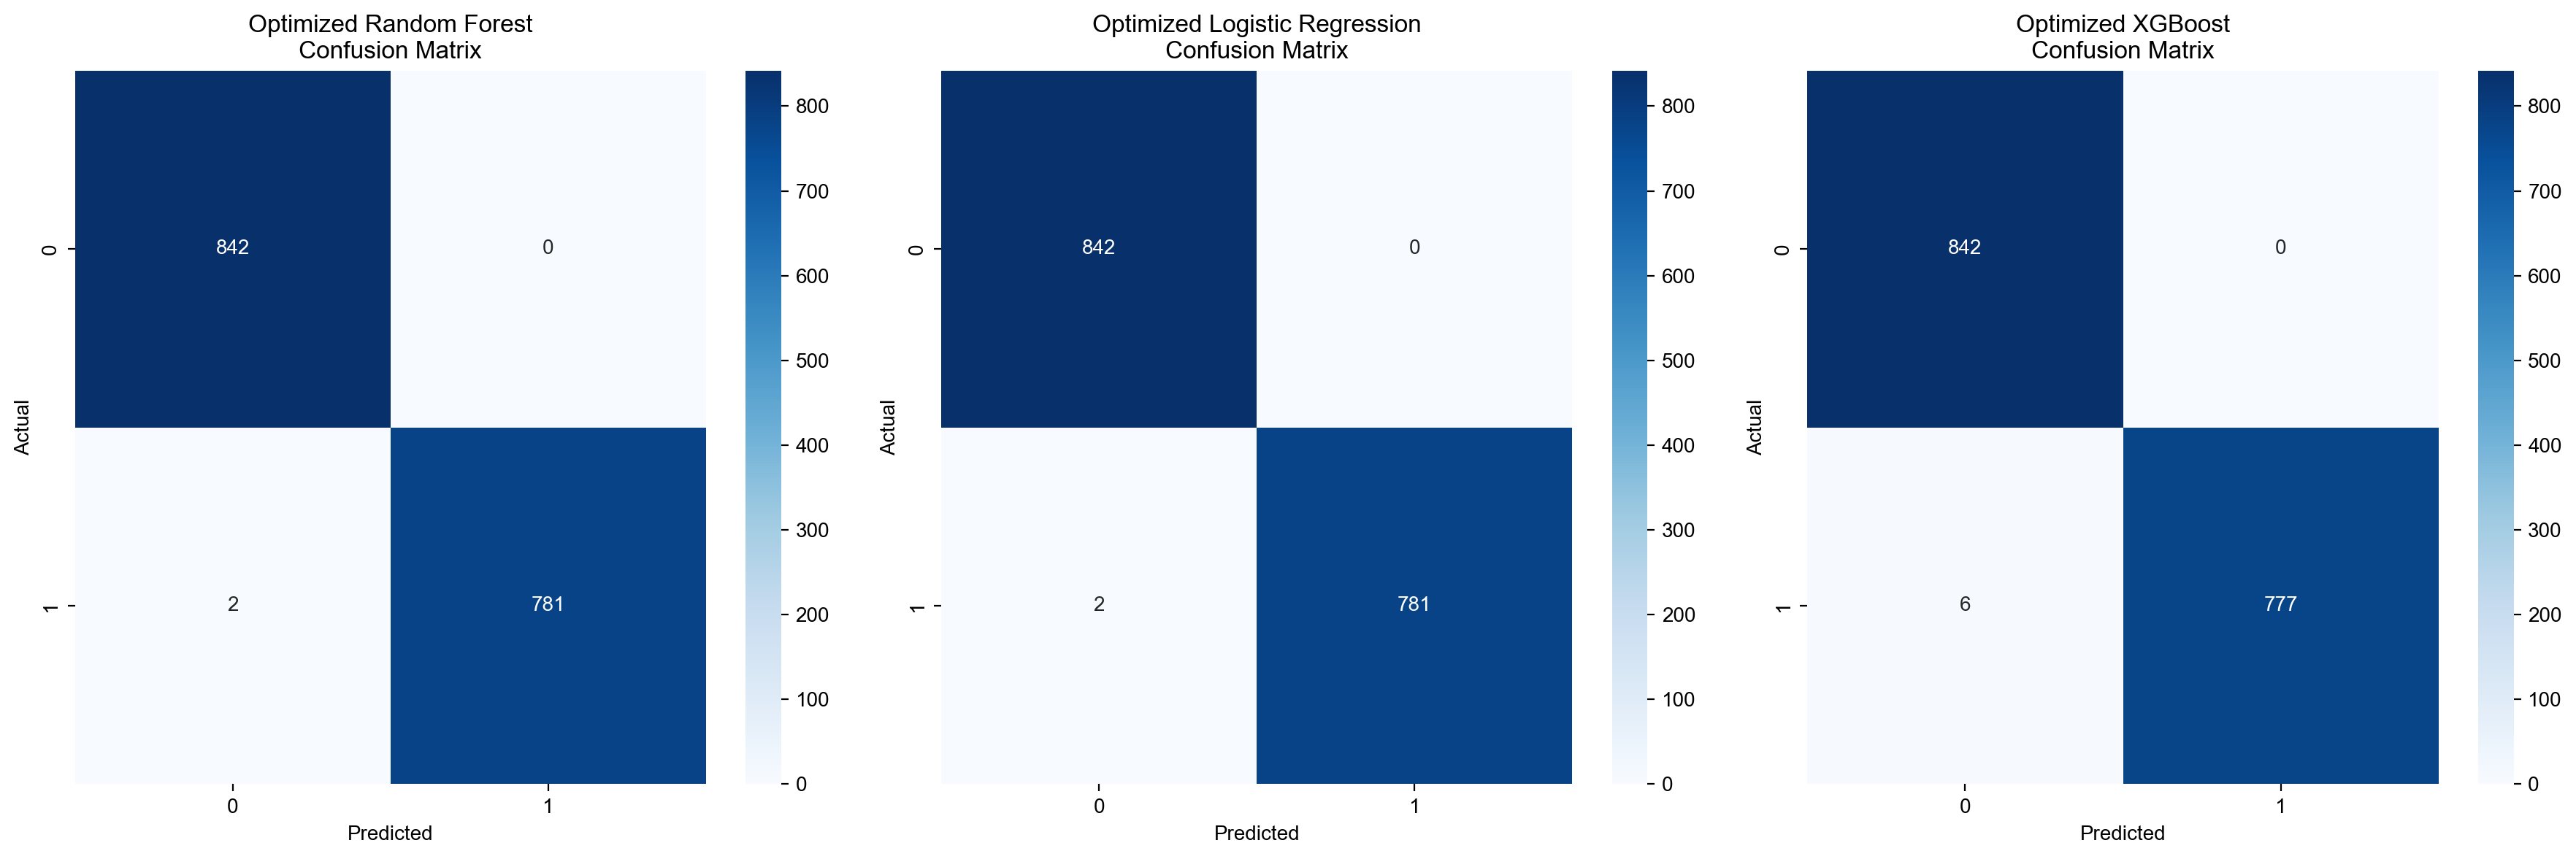

In [34]:
# 生成最佳化後模型的混淆矩陣
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 預測結果
y_pred_rf = best_rf.predict(X_test_pp)
y_pred_lr = best_lr.predict(X_test_pp)
y_pred_xgb = best_xgb.predict(X_test_pp)

# 混淆矩陣
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

models_cm = [
    (cm_rf, "Optimized Random Forest", axes[0]),
    (cm_lr, "Optimized Logistic Regression", axes[1]),
    (cm_xgb, "Optimized XGBoost", axes[2]),
]

for cm, title, ax in models_cm:
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{title}\nConfusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


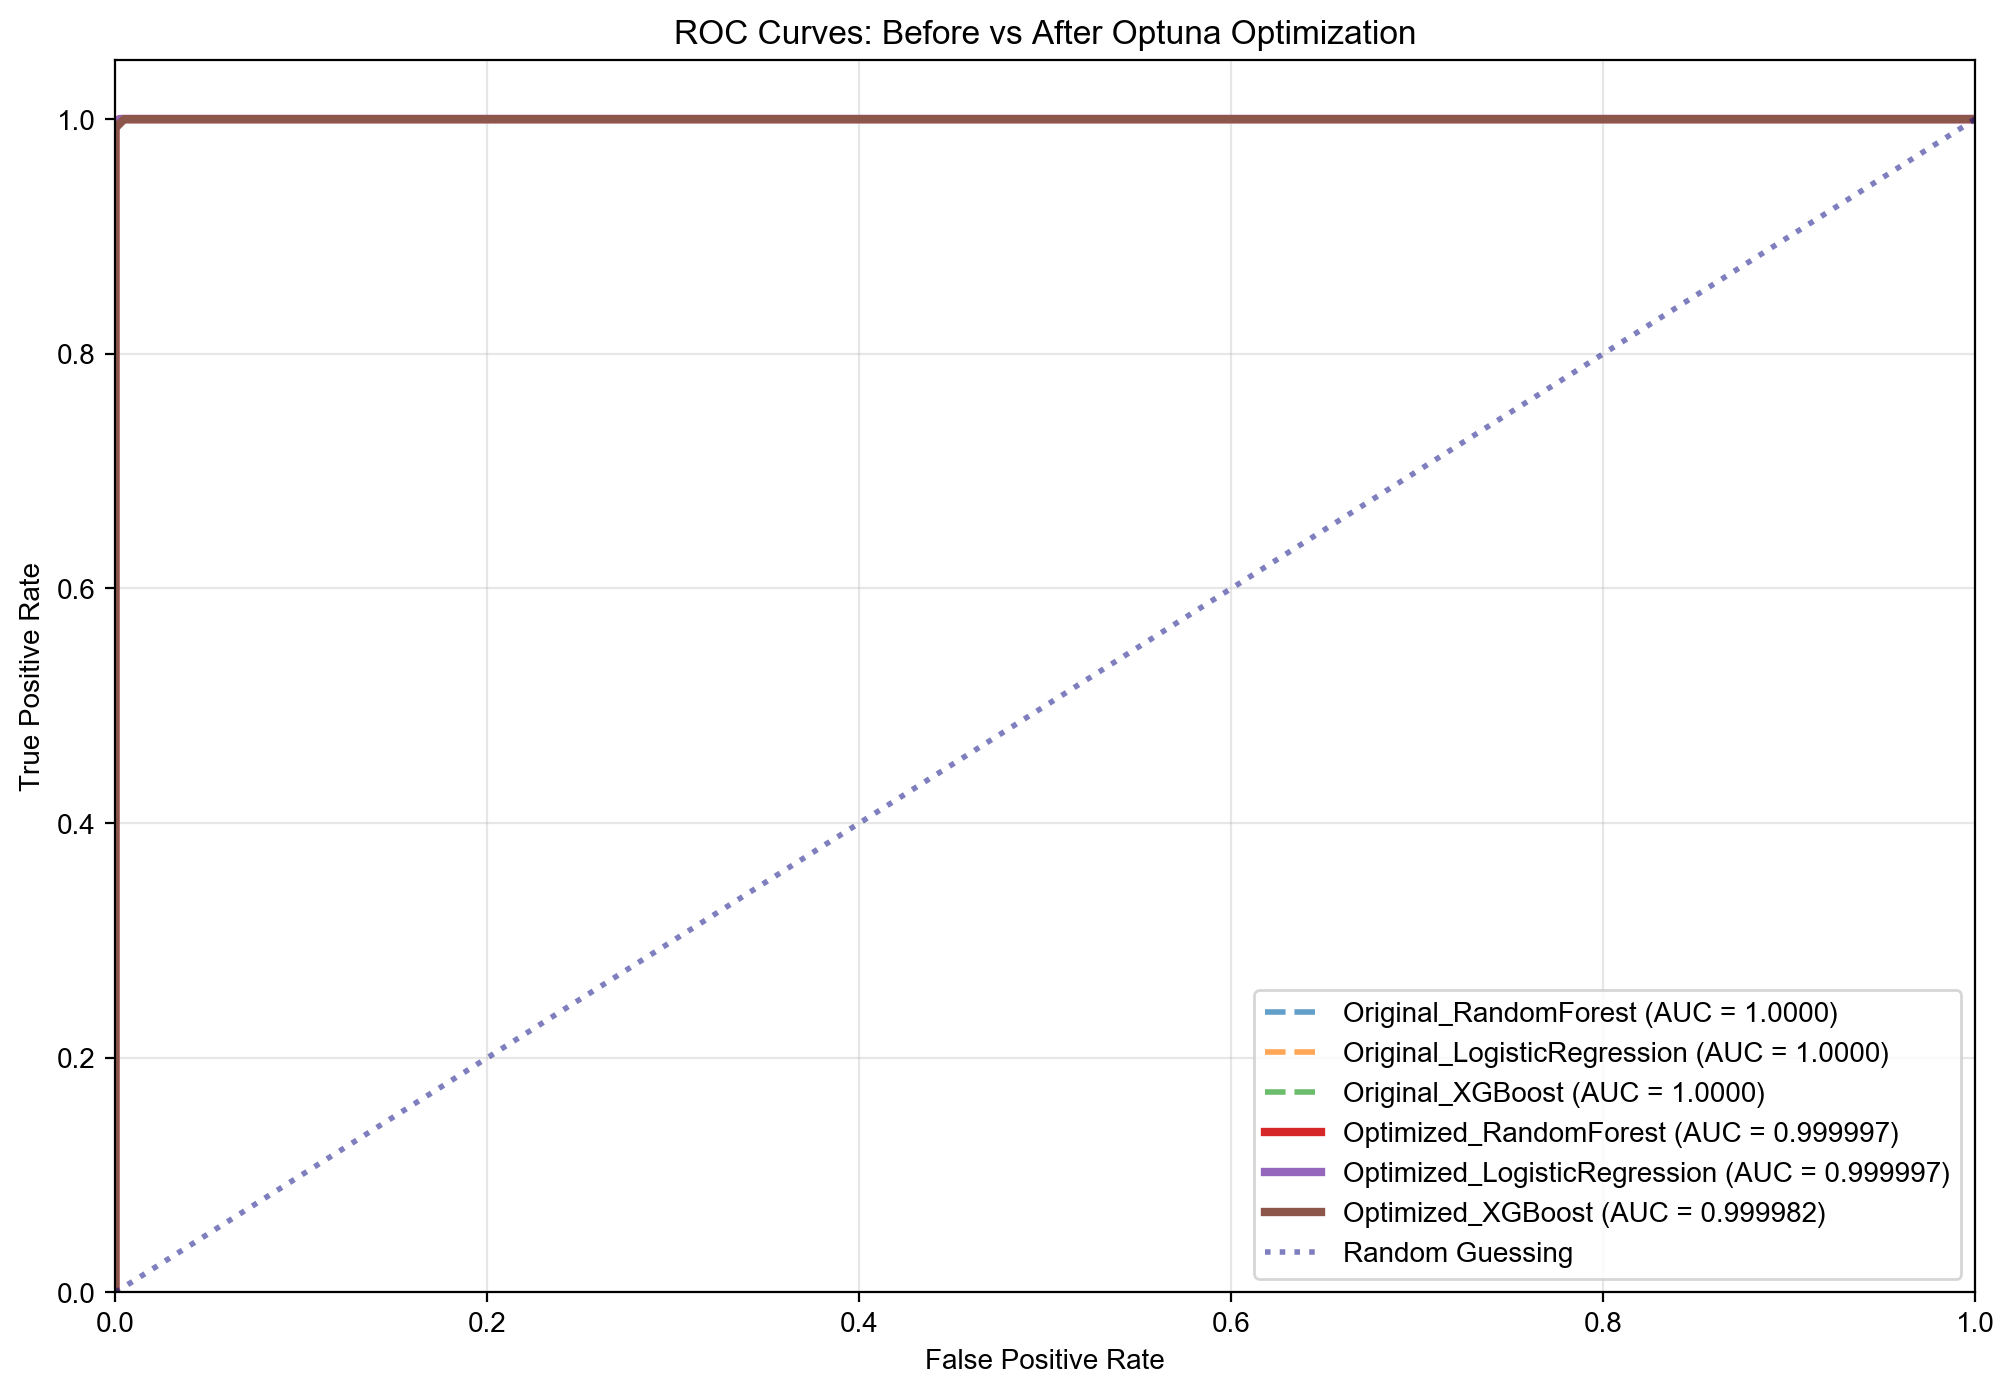

=== ROC-AUC 改善情況 ===

Random Forest AUC: 0.999997 -> 0.999997 (改善: 0.000000)

Logistic Regression AUC: 0.999997 -> 0.999997 (改善: 0.000000)

XGBoost AUC: 0.999982 -> 0.999982 (改善: 0.000000)


In [35]:
# 繪製優化後模型的 ROC-AUC 曲線
plt.figure(figsize=(12, 8))

# 計算並繪製原始模型的 ROC 曲線 (作為對比)
original_models = [
    ("Original_RandomForest", classifiers["RandomForest"]),
    ("Original_LogisticRegression", classifiers["LR"]),
    ("Original_XGBoost", classifiers["XGBoost"]),
]

for name, classifier in original_models:
    if hasattr(classifier, "predict_proba"):
        y_score = classifier.predict_proba(X_test_pp)[:, 1]
    else:
        y_score = classifier.decision_function(X_test_pp)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr, tpr, lw=2, linestyle="--", alpha=0.7, label=f"{name} (AUC = {roc_auc:.4f})"
    )

# 計算並繪製優化後模型的 ROC 曲線
for name, classifier in optimized_classifiers.items():
    y_score = classifier.predict_proba(X_test_pp)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, label=f"{name} (AUC = {roc_auc:.6f})")

plt.plot(
    [0, 1],
    [0, 1],
    color="navy",
    lw=2,
    linestyle=":",
    alpha=0.5,
    label="Random Guessing",
)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves: Before vs After Optuna Optimization")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 計算AUC改善
print("=== ROC-AUC 改善情況 ===")
original_auc_rf = roc_auc_score(
    y_test, classifiers["RandomForest"].predict_proba(X_test_pp)[:, 1]
)
original_auc_lr = roc_auc_score(
    y_test, classifiers["LR"].predict_proba(X_test_pp)[:, 1]
)
original_auc_xgb = roc_auc_score(
    y_test, classifiers["XGBoost"].predict_proba(X_test_pp)[:, 1]
)

optimized_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test_pp)[:, 1])
optimized_auc_lr = roc_auc_score(y_test, best_lr.predict_proba(X_test_pp)[:, 1])
optimized_auc_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test_pp)[:, 1])

auc_improvements = [
    ("Random Forest", original_auc_rf, optimized_auc_rf),
    ("Logistic Regression", original_auc_lr, optimized_auc_lr),
    ("XGBoost", original_auc_xgb, optimized_auc_xgb),
]

for model_name, original_auc, optimized_auc in auc_improvements:
    improvement = optimized_auc - original_auc
    print(
        f"\n{model_name} AUC: {original_auc:.6f} -> {optimized_auc:.6f} (改善: {improvement:.6f})"
    )
